<a href="https://colab.research.google.com/github/Gaurav2912/Customer-Segmentation-/blob/main/Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

![](https://miro.medium.com/max/720/1*NoFzCc5Piv9wP3QUbu71BA.webp)

# **Importing Libraries**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import scipy as sp
import math

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# For displaying ploty plot in colab nootbook
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
# set default gridtype, fontsize and palette
sns.set_style("whitegrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17', '#7C4DFF', '#FF5959'])
plt.rcParams['font.size'] = 14

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/capstone project/Customer Segmentation/'
# df= pd.read_excel(path + 'Online Retail.xlsx')
df= pd.read_csv(path + 'Online Retail.csv')  # pandas can read csv file faster compare to xlsx file 

In [ ]:
#checking top 5 rows of dataset
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [ ]:
#checking bottom 5 rows of dataset
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/11 12:50       0.85     12680.0  France  
541905  12/9/11 12:50       2.10     12680.0  France  
541906  12/9/11 12:50       4.15     12680.0  France  
541907  12/9/11 12:50       4.15     12680.0  France  
541908  12/9/11 12:50       4.95     12680.0  France

In [ ]:
#checking shape of dataset
df.shape

(541909, 8)

* dataframe have 8 rows and 541909 columns

In [ ]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# checking for unique values in sorted order
df.nunique().sort_values()

Country           38
Quantity         722
UnitPrice       1630
StockCode       4070
Description     4223
CustomerID      4372
InvoiceDate    23260
InvoiceNo      25900
dtype: int64

In [ ]:
# fucntion that give information about datatype, unique values and null values in datafeame
def breif_data_info(data):

  info_df = pd.DataFrame({
      'Dtype' : data.dtypes.values,
      'Number of Unique values' : df.nunique().values,
      'Null values': df.isnull().sum().values,
      'Percentage of Null values' : 100 * df.isnull().sum().values / len(df)
  }, index = data.columns
  )


  return info_df


breif_data_info(df)

Dtype  Number of Unique values  Null values  \
InvoiceNo     object                    25900            0   
StockCode     object                     4070            0   
Description   object                     4223         1454   
Quantity       int64                      722            0   
InvoiceDate   object                    23260            0   
UnitPrice    float64                     1630            0   
CustomerID   float64                     4372       135080   
Country       object                       38            0   

             Percentage of Null values  
InvoiceNo                     0.000000  
StockCode                     0.000000  
Description                   0.268311  
Quantity                      0.000000  
InvoiceDate                   0.000000  
UnitPrice                     0.000000  
CustomerID                   24.926694  
Country                       0.000000

## **Data Cleaning**

**Checking for null values**

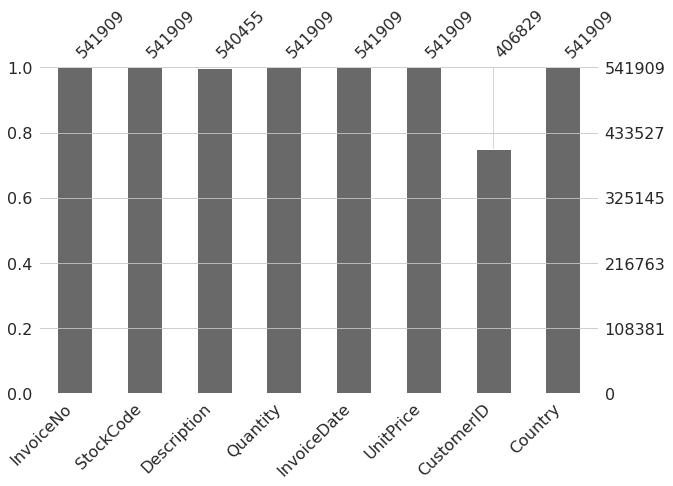

In [ ]:
# Visualize the number of missing
# values as a bar chart
msno.bar(df, figsize= (10,6));

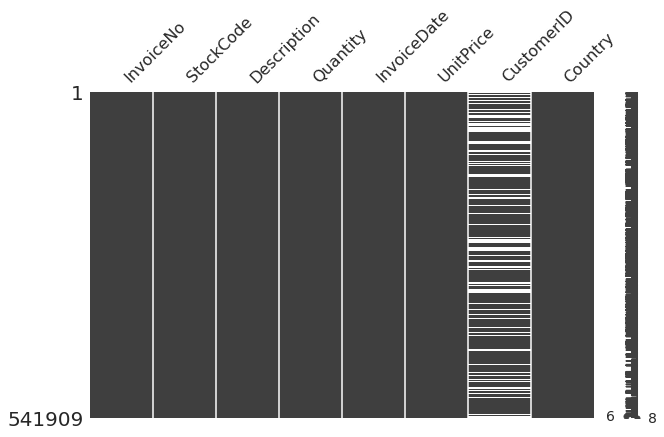

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df, figsize= (10,6));

* White line in heatmap represent the position of null values in dataframe.
* As we can see that almost 25 percent of the data in Customer ID are missing and Description have only 0.26 percent of missing data.
 
* For making customer segmentation these null values should be removed.

In [ ]:
# dropping all  null values
df.dropna(inplace=True)   

In [ ]:
#checking for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Checking for duplicate values
num_of_duplicate_rows = df.duplicated().sum()
print(f"There are {num_of_duplicate_rows} duplicate observations in dataframe.")

There are 5225 duplicate observations in dataframe.


In [ ]:
# dropping duplicate values
df = df.drop_duplicates()

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

All missing and duplicate values are gone.

---
Statistical summary 

In [ ]:
# statistical summary of non numerical features dataframe
df.describe(include= np.object)

InvoiceNo StockCode                         Description  \
count     401604    401604                              401604   
unique     22190      3684                                3896   
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq         542      2065                                2058   

           InvoiceDate         Country  
count           401604          401604  
unique           20460              37  
top     11/14/11 15:27  United Kingdom  
freq               543          356728

In [ ]:
# statistical summary of numeric features in dataframe
df.describe(percentiles = [.05, .25, .5, .75, .95])

Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
5%          1.000000       0.420000   12621.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
95%        36.000000       8.500000   17898.000000
max     80995.000000   38970.000000   18287.000000

* The maximum values in the Quantity and Unit price columns are far from the general trend.
* The minimum value of these feature should be zero, can not be negative.

Let's explore negative values

In [ ]:
df[df['Quantity'] < 0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

          InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/10 9:41      27.50     14527.0  United Kingdom  
154      12/1/10 9:49       4.65     15311.0  United Kingdom  
235     12/1/10 10:24       1.65     17548.0  United Kingdom  
236     12/1/10 10:24       0.29     17548.0  United Kingdom  
237     12/1/10 10:24       0.29     17548.0  United Kingdom  
...               ...        ...         ...             ...  
540449   12/9/11 9:57       0.83     14397.0  United Kingdom  
541541  12/9/11 10:28     224.69     15498.0  United Kingdom  
541715  12/9/11 11:57      10.95     15311.0  United Kingdom  
541716  12/9/11 11:58       1.25     17315.0  United Kingdom  
541717  12/9/11 11:58       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

* It seems that these negative values correspond to a canceled transaction.

I am selecting only positive values for Quantity and non negative values for UnitPrice

In [ ]:
df = df[(df['Quantity'] > 0)]

In [ ]:
# Let's check all canceled transactions
df[df['InvoiceNo'].str.contains('C')]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

All canceled transactions are also gone.

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  392732.000000  392732.000000  392732.000000
mean       13.153718       3.125596   15287.734822
std       181.588420      22.240725    1713.567773
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13955.000000
50%         6.000000       1.950000   15150.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000    8142.750000   18287.000000

In [ ]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
old_num_rows = 541909
new_num_rows = df.shape[0]

percent_removal = 100 * (old_num_rows - new_num_rows) / old_num_rows
print(f"After data cleaning {round(percent_removal, 2)} % of rows in dataframe are gone") 

After data cleaning 27.53 % of rows in dataframe are gone


# Feature Engineering



In [ ]:
# New column for Total Price which is product of Quantity and UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

Extract part of date

* Year
* Month
* Day
* Weekday
* Hour

And also create a column index with the minimum invoice date aka first time customer was acquired.

[pandas.DataFrame.transform Documentation ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html)

In [ ]:
# Convert InvoiceDate to datetime object
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'])

# groupby customerID  take InvoiceDate take minimum of InvoiceDate and than fill the minimum 
df['CohortDate'] =  df.groupby('CustomerID')['InvoiceDate'].transform('min')

# For cohort date we need only year and month  
df['CohortDate'] =  df['CohortDate'].apply(lambda x: datetime(x.year, x.month, 1)) # add as 1 as %d  because we are intrested in month and year only 

df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

        TotalAmount CohortDate  
0             15.30 2010-12-01  
1             20.34 2010-12-01  
2             22.00 2010-12-01  
3             20.34 2010-12-01  
4             20.34 2010-12-01  
...             ...        ...  
541904        10.20 2011-08-01  
541905        12.60 2011-08-01  
541906        16.60 2011-08-01  
541907        16.60 2011-08-01  
541908        14.85 2011-08-01  

[392732 rows x 10 columns]

In [ ]:
def add_year_month(data, col):
  """Extract then create  Month and Year Column"""
  data[col+'_Year'] = data[col].dt.year               # Extract and create year 
  data[col+'_Month'] = data[col].dt.month             # Extract and create month in numerical format


def add_dateparts(data, col):
  """
  Extract then create  MonthName, Day, Weekday and WeekdayName and Hour.
  """
  data['MonthName'] = data[col].dt.month_name()      # Extract and create month name
  data['Day'] = data[col].dt.day                    # Extract and create day in numerical fromat 
  data['WeekdayName'] = data[col].dt.day_name()     # Extract and create weekday  name
  data['Weekday'] = data[col].dt.weekday             # Extract and create weekday in number
  data['Hour'] = data[col].dt.hour                  # Extract and create hour

In [ ]:
# add year and month for Invoice and cohort date
add_year_month(data= df,col= 'InvoiceDate')
add_year_month(data= df,col= 'CohortDate')

# add other dateparts  with "InvoiceDate" columns only
add_dateparts(data= df,col=  'InvoiceDate')

In [ ]:
def map_quarter(month_num, year):
  '''
  A quarter is a three-month period on a company's financial calendar, this function return quarter of that month.
  '''
  # January, February, and March 

  year = str(year)[-2:]  # typecast to str for concatination

  if month_num <  4: 
    return year +  '-Q1'
  # April, May, and June
  if month_num < 7:
    return year + '-Q2'
  # July, August, and September
  if month_num < 10:
    return year + '-Q3'
  # October, November, and December 
  return year + '-Q4'


def time_type(time):
  """
  return 'Morning', 'Afternoon', 'Evening' and 'Night' based on timing.
  """
  # Morning is from sunrise to 11:59 AM. Sunrise typically occurs around 6 AM.
  if 6 <= time <  12: 
    return 'Morning'
  # Afternoon is from 12:01 PM to around 5:00 PM, Noon is at 12:00 PM.
  if 12<= time < 17:
    return 'Afternoon'
  # Evening is from 5:01 PM to 8 PM, or around sunset.
  if 17 <= time <= 20:
    return 'Evening'
  # Night is from sunset to sunrise, so from 8:01 PM until 5:59 AM.
  return 'Night' 

In [ ]:
# create column for weekend
# df['Weekend'] = df['Weekday'].apply(lambda x: True if x in [5,6] else False)  
#  or faster method
df['Weekend'] = np.vectorize(lambda x: True if x in [5,6] else False)(df['Weekday'])

# To create quarter column
# df['Quarter'] =  df.apply(lambda x : map_quarter(x['InvoiceDate_Month']), axis= 1)
df['Quarter'] = np.vectorize(map_quarter)(df['InvoiceDate_Month'], df['InvoiceDate_Year'])

#  TimeType column
df['TimeType'] = np.vectorize(time_type)(df['Hour'])

In [ ]:
# diffrence of Year and Month
year_diff = df['InvoiceDate_Year'] - df['CohortDate_Year']
month_diff = df['InvoiceDate_Month'] - df['CohortDate_Month']

# create a cohort period , 12 month in year with month 
df['CohortPeriod'] = 12 * year_diff + month_diff 

df.head().T

0                    1  \
InvoiceNo                                      536365               536365   
StockCode                                      85123A                71053   
Description        WHITE HANGING HEART T-LIGHT HOLDER  WHITE METAL LANTERN   
Quantity                                            6                    6   
InvoiceDate                       2010-12-01 08:26:00  2010-12-01 08:26:00   
UnitPrice                                        2.55                 3.39   
CustomerID                                    17850.0              17850.0   
Country                                United Kingdom       United Kingdom   
TotalAmount                                      15.3                20.34   
CohortDate                        2010-12-01 00:00:00  2010-12-01 00:00:00   
InvoiceDate_Year                                 2010                 2010   
InvoiceDate_Month                                  12                   12   
CohortDate_Year                                  2010                 2010   
CohortDate_Month                                   12                   12   
MonthName                                    December             December   
Day                                                 1                    1   
WeekdayName                                 Wednesday            Wednesday   
Weekday                                             2                    2   
Hour                                                8                    8   
Weekend                                         False                False   
Quarter                                         10-Q4                10-Q4   
TimeType                                      Morning              Morning   
CohortPeriod                                        0                    0   

                                                2  \
InvoiceNo                                  536365   
StockCode                                  84406B   
Description        CREAM CUPID HEARTS COAT HANGER   
Quantity                                        8   
InvoiceDate                   2010-12-01 08:26:00   
UnitPrice                                    2.75   
CustomerID                                17850.0   
Country                            United Kingdom   
TotalAmount                                  22.0   
CohortDate                    2010-12-01 00:00:00   
InvoiceDate_Year                             2010   
InvoiceDate_Month                              12   
CohortDate_Year                              2010   
CohortDate_Month                               12   
MonthName                                December   
Day                                             1   
WeekdayName                             Wednesday   
Weekday                                         2   
Hour                                            8   
Weekend                                     False   
Quarter                                     10-Q4   
TimeType                                  Morning   
CohortPeriod                                    0   

                                                     3  \
InvoiceNo                                       536365   
StockCode                                       84029G   
Description        KNITTED UNION FLAG HOT WATER BOTTLE   
Quantity                                             6   
InvoiceDate                        2010-12-01 08:26:00   
UnitPrice                                         3.39   
CustomerID                                     17850.0   
Country                                 United Kingdom   
TotalAmount                                      20.34   
CohortDate                         2010-12-01 00:00:00   
InvoiceDate_Year                                  2010   
InvoiceDate_Month                                   12   
CohortDate_Year                                   2010   
CohortDate_Month                                    12   
MonthName                           

In [ ]:
# check the cohort period in tail
df.tail().T

541904                        541905  \
InvoiceNo                               581587                        581587   
StockCode                                22613                         22899   
Description        PACK OF 20 SPACEBOY NAPKINS  CHILDREN'S APRON DOLLY GIRL    
Quantity                                    12                             6   
InvoiceDate                2011-12-09 12:50:00           2011-12-09 12:50:00   
UnitPrice                                 0.85                           2.1   
CustomerID                             12680.0                       12680.0   
Country                                 France                        France   
TotalAmount                               10.2                          12.6   
CohortDate                 2011-08-01 00:00:00           2011-08-01 00:00:00   
InvoiceDate_Year                          2011                          2011   
InvoiceDate_Month                           12                            12   
CohortDate_Year                           2011                          2011   
CohortDate_Month                             8                             8   
MonthName                             December                      December   
Day                                          9                             9   
WeekdayName                             Friday                        Friday   
Weekday                                      4                             4   
Hour                                        12                            12   
Weekend                                  False                         False   
Quarter                                  11-Q4                         11-Q4   
TimeType                             Afternoon                     Afternoon   
CohortPeriod                                 4                             4   

                                          541906  \
InvoiceNo                                 581587   
StockCode                                  23254   
Description        CHILDRENS CUTLERY DOLLY GIRL    
Quantity                                       4   
InvoiceDate                  2011-12-09 12:50:00   
UnitPrice                                   4.15   
CustomerID                               12680.0   
Country                                   France   
TotalAmount                                 16.6   
CohortDate                   2011-08-01 00:00:00   
InvoiceDate_Year                            2011   
InvoiceDate_Month                             12   
CohortDate_Year                             2011   
CohortDate_Month                               8   
MonthName                               December   
Day                                            9   
WeekdayName                               Friday   
Weekday                                        4   
Hour                                          12   
Weekend                                    False   
Quarter                                    11-Q4   
TimeType                               Afternoon   
CohortPeriod                                   4   

                                            541907  \
InvoiceNo                                   581587   
StockCode                                    23255   
Description        CHILDRENS CUTLERY CIRCUS PARADE   
Quantity                                         4   
InvoiceDate                    2011-12-09 12:50:00   
UnitPrice                                     4.15   
CustomerID                                 12680.0   
Country                                     France   
TotalAmount                                   16.6   
CohortDate                     2011-08-01 00:00:00   
InvoiceDate_Year                              2011   
InvoiceDate_Month                               12   
CohortDate_Year                               2011   
CohortDate_Month                                 8   
MonthName                                 December   
Day   

# EDA
-----
It is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 
____
let's do some exploration and visulization for different - different  data.

In [ ]:
# count the unique customer ID by grouping Cohort Date and CohortPeriod 
df.groupby(['CohortDate','CohortPeriod'])['CustomerID'].apply(pd.Series.nunique)

CohortDate  CohortPeriod
2010-12-01  0               885
            1               324
            2               286
            3               340
            4               321
                           ... 
2011-10-01  1                86
            2                41
2011-11-01  0               324
            1                36
2011-12-01  0                41
Name: CustomerID, Length: 91, dtype: int64

In [ ]:
# count the unique customer ID by grouping by Cohort Month  and CohortPeriod 
cohort_df = df.groupby(['CohortDate','CohortPeriod'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_df.rename(columns = {'CustomerID':'CustomerCount'}, inplace = True)
cohort_df

CohortDate  CohortPeriod  CustomerCount
0  2010-12-01             0            885
1  2010-12-01             1            324
2  2010-12-01             2            286
3  2010-12-01             3            340
4  2010-12-01             4            321
..        ...           ...            ...
86 2011-10-01             1             86
87 2011-10-01             2             41
88 2011-11-01             0            324
89 2011-11-01             1             36
90 2011-12-01             0             41

[91 rows x 3 columns]

### **Cohort Retention Analysis**

Cohort analysis is a subset of behavioral analytics that takes the data from a given eCommerce platform, web application, or online game and rather than looking at all users as one unit, it breaks them into related groups for analysis. These related groups, or cohorts, usually share common characteristics or experiences within a defined time-span.

Cohort analysis is a tool to measure user engagement over time. It helps to know whether user engagement is actually getting better over time or is only appearing to improve because of growth.

Cohort analysis proves to be valuable because it helps to separate growth metrics from engagement metrics as growth can easily mask engagement problems. In reality, the lack of activity of the old users is being hidden by the impressive growth numbers of new users, which results in concealing the lack of engagement from a small number of people.



![](https://d35fo82fjcw0y8.cloudfront.net/2016/03/03210554/table1a2.png)

In [ ]:
# create a pivot table 
cohort_table = cohort_df.pivot(index='CohortDate', columns=['CohortPeriod'],values='CustomerCount')

# change index format
cohort_table.index = cohort_table.index.strftime('%B %Y')

# creating last column which is sum of all user 
cohort_table.loc["All Customers"] = cohort_table.sum(axis= 0)  # sum across axis = 0

cohort_table

CohortPeriod        0      1      2      3      4      5      6      7   \
CohortDate                                                                
December 2010    885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
January 2011     417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
February 2011    380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
March 2011       452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
April 2011       300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
May 2011         284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
June 2011        242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
July 2011        188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
August 2011      169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
September 2011   299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
October 2011     358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
November 2011    324.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
December 2011     41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
All Customers   4339.0  976.0  942.0  927.0  905.0  878.0  804.0  725.0   

CohortPeriod       8      9      10     11     12  
CohortDate                                         
December 2010   313.0  350.0  331.0  445.0  235.0  
January 2011    125.0  136.0  152.0   49.0    NaN  
February 2011    94.0  116.0   26.0    NaN    NaN  
March 2011      126.0   39.0    NaN    NaN    NaN  
April 2011       22.0    NaN    NaN    NaN    NaN  
May 2011          NaN    NaN    NaN    NaN    NaN  
June 2011         NaN    NaN    NaN    NaN    NaN  
July 2011         NaN    NaN    NaN    NaN    NaN  
August 2011       NaN    NaN    NaN    NaN    NaN  
September 2011    NaN    NaN    NaN    NaN    NaN  
October 2011      NaN    NaN    NaN    NaN    NaN  
November 2011     NaN    NaN    NaN    NaN    NaN  
December 2011     NaN    NaN    NaN    NaN    NaN  
All Customers   680.0  641.0  509.0  494.0  235.0

In [ ]:
# retention_table In form of percentage

# grab the 1st CohortPeriod of all months from  using cohort_table.iloc[:,0] then divide it to every columns
retention_table =  cohort_table.divide(cohort_table.iloc[:,0], axis=0).round(3)

100*retention_table

CohortPeriod       0     1     2     3     4     5     6     7     8     9   \
CohortDate                                                                    
December 2010   100.0  36.6  32.3  38.4  36.3  39.8  36.3  34.9  35.4  39.5   
January 2011    100.0  22.1  26.6  23.0  32.1  28.8  24.7  24.2  30.0  32.6   
February 2011   100.0  18.7  18.7  28.4  27.1  24.7  25.3  27.9  24.7  30.5   
March 2011      100.0  15.0  25.2  19.9  22.3  16.8  26.8  23.0  27.9   8.6   
April 2011      100.0  21.3  20.3  21.0  19.7  22.7  21.7  26.0   7.3   NaN   
May 2011        100.0  19.0  17.3  17.3  20.8  23.2  26.4   9.5   NaN   NaN   
June 2011       100.0  17.4  15.7  26.4  23.1  33.5   9.5   NaN   NaN   NaN   
July 2011       100.0  18.1  20.7  22.3  27.1  11.2   NaN   NaN   NaN   NaN   
August 2011     100.0  20.7  24.9  24.3  12.4   NaN   NaN   NaN   NaN   NaN   
September 2011  100.0  23.4  30.1  11.4   NaN   NaN   NaN   NaN   NaN   NaN   
October 2011    100.0  24.0  11.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
November 2011   100.0  11.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
December 2011   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
All Customers   100.0  22.5  21.7  21.4  20.9  20.2  18.5  16.7  15.7  14.8   

CohortPeriod      10    11    12  
CohortDate                        
December 2010   37.4  50.3  26.6  
January 2011    36.5  11.8   NaN  
February 2011    6.8   NaN   NaN  
March 2011       NaN   NaN   NaN  
April 2011       NaN   NaN   NaN  
May 2011         NaN   NaN   NaN  
June 2011        NaN   NaN   NaN  
July 2011        NaN   NaN   NaN  
August 2011      NaN   NaN   NaN  
September 2011   NaN   NaN   NaN  
October 2011     NaN   NaN   NaN  
November 2011    NaN   NaN   NaN  
December 2011    NaN   NaN   NaN  
All Customers   11.7  11.4   5.4

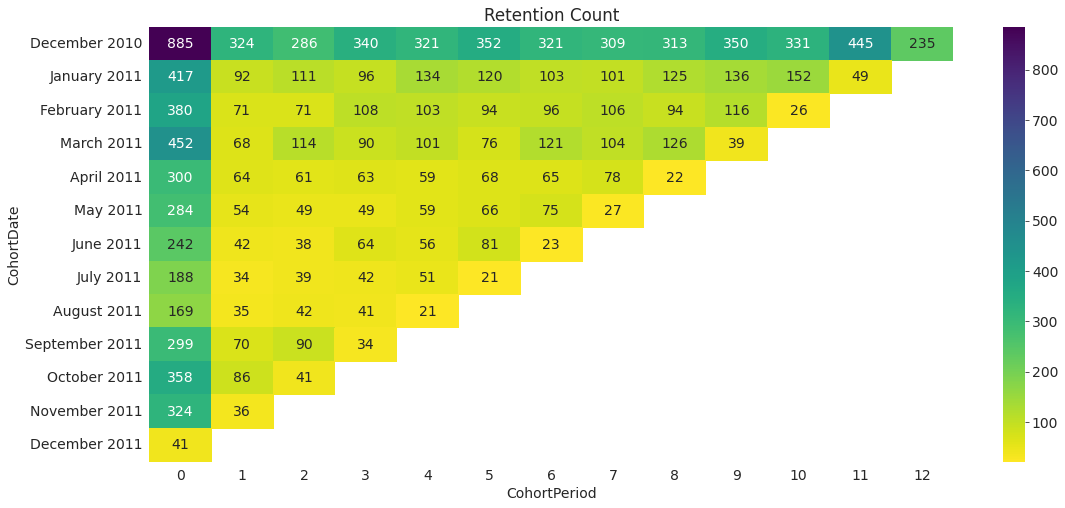

In [ ]:
#visualize our results in heatmap for Retention Count
plt.figure(figsize=(18,8))
# Removing all clients sum because the color scaling is distorted, if u wnt to see than see it in table
sns.heatmap(cohort_table.iloc[:-1],annot=True, cmap= 'viridis_r', fmt='.4g').set_title("Retention Count");

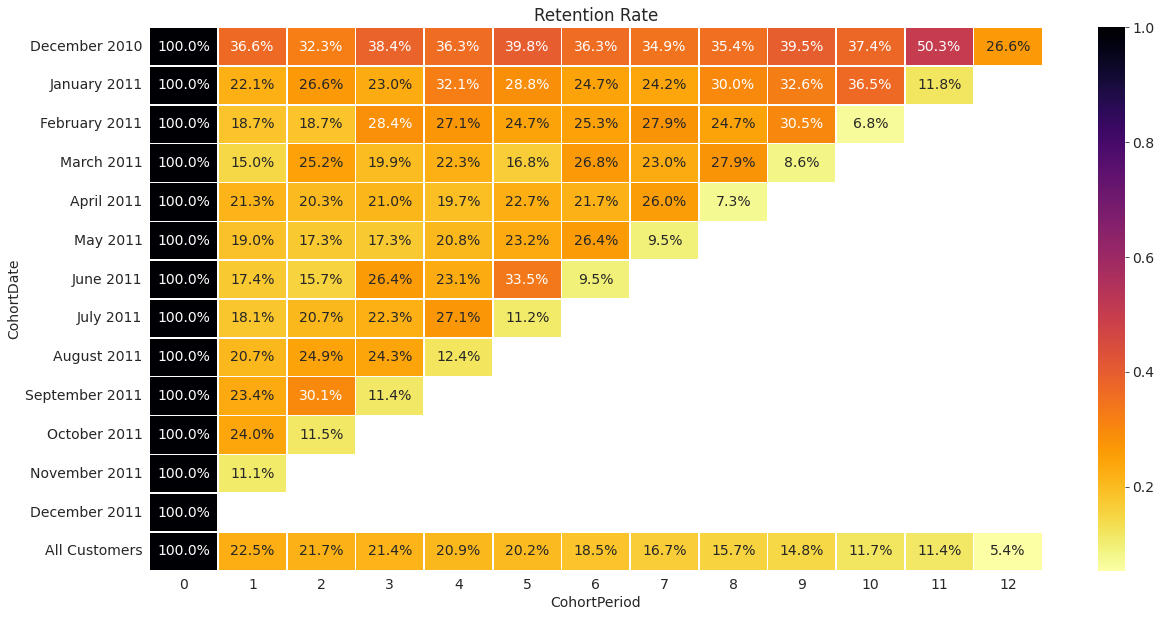

In [ ]:
# visualize our results in heatmap Retention Rate

plt.figure(figsize=(20,10))
sns.heatmap(retention_table, annot=True,  fmt = '.1%', cmap= 'inferno_r', linewidth= .5).set_title("Retention Rate");

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* The Rows represent Activity that is month of acquisition
* Column represent Retention ie. Month since acquisition

>*How to Interpret retention table*
- On December 2010 there were 885 new customers out of which 334 customers which is 36.6% of 885 remains in next month and so on.. 
- 300 new customers added in April 2011, 19.7% of 300 i.e. 59 customers were retained after 4 months (August 2011) .
- How many overall customers in March 2011 ? 
  - 452 new customers, 71 customers who joined last month, 111 customers who joined 2 months ago and 340 customers who joined 3 months ago. Total number of customers 452 + 71 + 111 + 340 = 974
- Customer corresponds to December 2010 (as their first month of purchase) have highest retention rate among all customers.

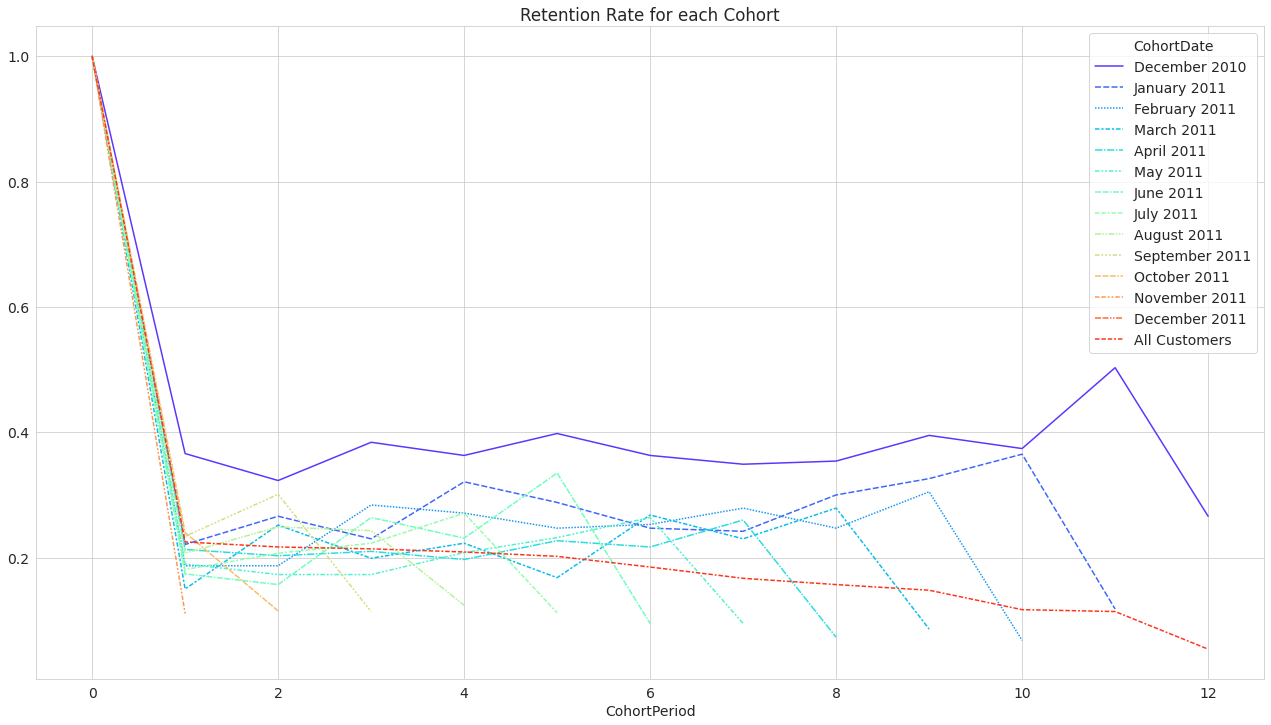

In [ ]:
# line plot
plt.figure(figsize= (22,12))
sns.lineplot(data=retention_table.T, palette= 'rainbow').set_title("Retention Rate for each Cohort");

- The graph of retention rate for all users is monotonically decreasing, while the graph for cohort dates from December 2010 to September 2011 is not monotonic in nature.

**Bar plot**
* Products with its Frequency
* Products with number of items sold
* Products with TotalAmount
* Most expencive Products.  

----


In [ ]:
# define some functions

def percentage_calulator(series_name):
  """Calculate and return percentage value per item in given series."""

  return 100 * series_name / series_name.sum()


def horizontal_nbar(series_name, title_str, palette= None, percentage= True, count= True, n= 10, figsize_tup= (12,7)):
  """
  Plot bar graph for top n product in given series.
  """
 
  plt.figure(figsize= figsize_tup)
  
  item_names = series_name[:n].index     # grab the index
  item_values = series_name[:n].values   # grab the values 

  # barplot
  sns.barplot(x= item_values, y= item_names, 
            palette= palette).set_title(title_str)

  # calulate percentage
  percent_item = percentage_calulator(series_name)

  plt.xlabel("count")

  # To write text on each bar of the bar plot
  for i in range(n):
    # x is position of text on x-axis, s is value that have to write on plot
    if percentage:   # do you want to write percentage
    # percent values
      plt.text(y= i + 0.2,x = item_values[i], s= str(round(percent_item[i],2)) + " %", 
              fontsize=15, color='black')
    
    # actual value
    if count:   # do you want to write count
      plt.text(y= i + 0.1, x = min(item_values) / 10, s= round(item_values[i],2),   
              fontsize=15, color='white')
      

In [ ]:
def vertical_barplot(column, title_str,  palette= None, figsize_tup= (14,7), 
                     font_size= 12, dtframe= df):
  """
  Plot bar graph for categorical variable.
  """
 
  plt.figure(figsize= figsize_tup)

  # sort value of that column
  column_count = dtframe[column].value_counts()
  item_index = column_count.keys()
  item_values = column_count.values


  # barplot
  sns.barplot(y= item_values, x= item_index, 
            palette= palette, order= item_index).set_title(title_str)

  # lineplot
  # white line
  sns.lineplot(x= item_index, y= item_values / 1.5 ,
                 color= 'white', marker= 'o')


  # calulate percentage
  percent_item = percentage_calulator(column_count)
  percent_item

  # To write text on each bar of the bar plot
  for i in range(len(item_index)):
    # y is position of text on y-axis, s is value that have to write on plot
    # percent values
    plt.text(x= i - 0.3,y = item_values[i] + max(item_values) / 200 , s= str(round(percent_item[i],1)) + "%", 
            fontsize= font_size, color='black', weight='bold')
    

  plt.ylabel("count")
  plt.xlabel(column)
      

**Products with its Frequency**

In [ ]:
prod_freq = df['Description'].value_counts()
prod_freq.head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64

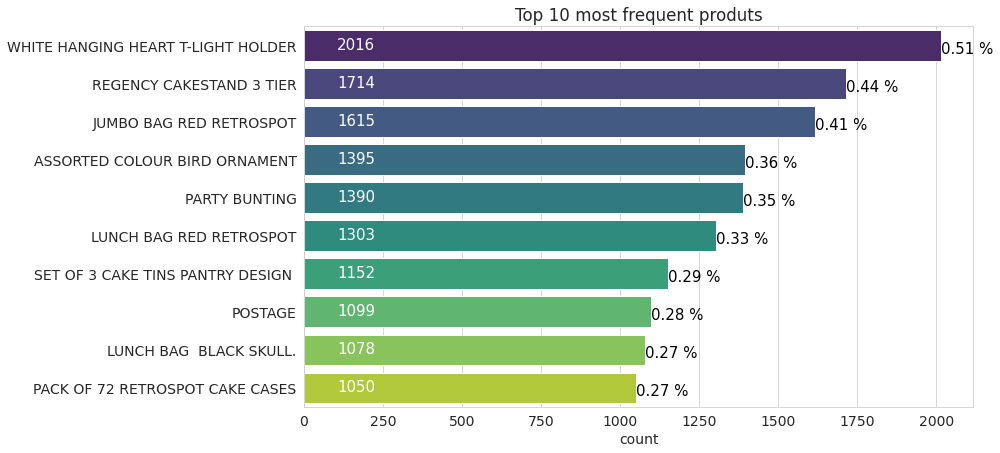

In [ ]:
# Bar plot of Top 10 most frequent produts, white text is actual value and black text for percentage
horizontal_nbar(series_name= prod_freq, title_str= "Top 10 most frequent produts",palette= 'viridis')

In [ ]:
# least popular products with minimum values
prod_freq[prod_freq == min(prod_freq)]

BEADED LOVE HEART JEWELLERY SET        1
ANTIQUE RASPBERRY FLOWER EARRINGS      1
FIRE POLISHED GLASS BRACELET MONTAN    1
FLOWER GLASS GARLD NECKL36"TURQUOIS    1
BIG POLKADOT MUG                       1
                                      ..
GREEN WITH METAL BAG CHARM             1
WHITE WITH METAL BAG CHARM             1
BLUE/NAT SHELL NECKLACE W PENDANT      1
PINK EASTER HENS+FLOWER                1
PAPER CRAFT , LITTLE BIRDIE            1
Name: Description, Length: 213, dtype: int64

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 popular products are
- WHITE HANGING HEART T-LIGHT HOLDER   
- JUMBO BAG RED RETROSPOT              
- REGENCY CAKESTAND 3 TIER             
- PARTY BUNTING                        
- LUNCH BAG RED RETROSPOT              
- ASSORTED COLOUR BIRD ORNAMENT        
- SET OF 3 CAKE TINS PANTRY DESIGN     
- PACK OF 72 RETROSPOT CAKE CASES      
- LUNCH BAG  BLACK SKULL.              
- NATURAL SLATE HEART CHALKBOARD

213 products that are least popular, sold only once.

---
**Products with number of items sold**

In [ ]:
prod_sold = df.groupby('Description')['Quantity'].sum().sort_values(ascending= False)
prod_sold.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

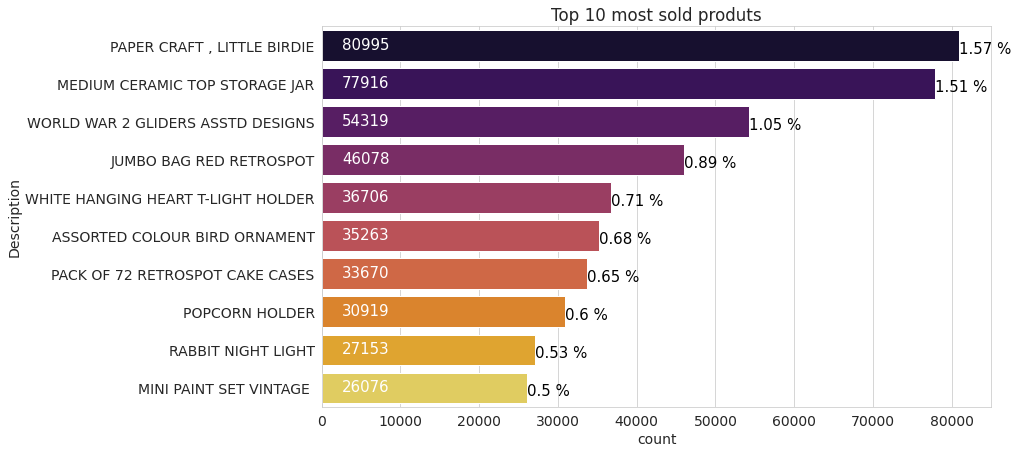

In [ ]:
# Bar plot
horizontal_nbar(series_name = prod_sold,title_str=  "Top 10 most sold produts", palette ='inferno')

In [ ]:
# least sold products are
prod_sold[prod_sold == min(prod_sold)].head()

Description
FUNKY MONKEY MUG                    1
SET 36 COLOURING PENCILS DOILEY     1
SET/3 FLORAL GARDEN TOOLS IN BAG    1
PINK CRYSTAL GUITAR PHONE CHARM     1
BLUE PADDED SOFT MOBILE             1
Name: Quantity, dtype: int64

In [ ]:
# total number of least sold products 
len(prod_sold[prod_sold == min(prod_sold)])

59

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 most sold produts
- PAPER CRAFT , LITTLE BIRDIE       
- MEDIUM CERAMIC TOP STORAGE JAR    
- WORLD WAR 2 GLIDERS ASSTD DESIGNS 
- JUMBO BAG RED RETROSPOT           
- WHITE HANGING HEART T-LIGHT HOLDER
- ASSORTED COLOUR BIRD ORNAMENT     
- PACK OF 72 RETROSPOT CAKE CASES   
- POPCORN HOLDER                    
- RABBIT NIGHT LIGHT                
- MINI PAINT SET VINTAGE            

59 products that are the least popular and only one item is sold.

---
**Products with TotalAmount**

In [ ]:
prod_total_amount = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending= False)   
prod_total_amount.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalAmount, dtype: float64

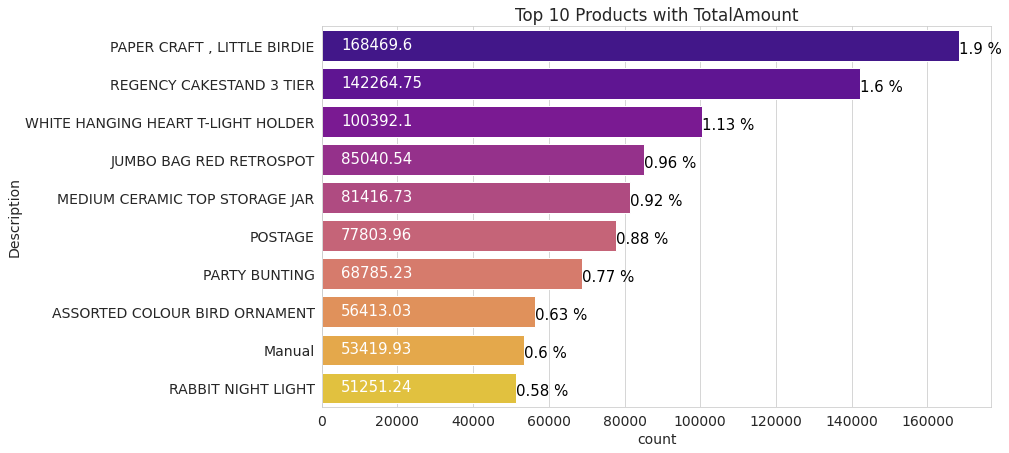

In [ ]:
# Bar plot 
horizontal_nbar(series_name= prod_total_amount, title_str= "Top 10 Products with TotalAmount", palette= 'plasma')

In [ ]:
# bottom 10 products with with TotalAmount
prod_total_amount.tail(10)

Description
PACK 4 FLOWER/BUTTERFLY PATCHES        1.250
60 GOLD AND SILVER FAIRY CAKE CASES    1.100
HAPPY BIRTHDAY CARD TEDDY/CAKE         0.950
CAT WITH SUNGLASSES BLANK CARD         0.950
PINK CRYSTAL GUITAR PHONE CHARM        0.850
PURPLE FRANGIPANI HAIRCLIP             0.850
VINTAGE BLUE TINSEL REEL               0.840
SET 12 COLOURING PENCILS DOILEY        0.650
HEN HOUSE W CHICK IN NEST              0.420
PADS TO MATCH ALL CUSHIONS             0.003
Name: TotalAmount, dtype: float64

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 Products with TotalAmount
- PAPER CRAFT , LITTLE BIRDIE       
- REGENCY CAKESTAND 3 TIER          
- WHITE HANGING HEART T-LIGHT HOLDER
- JUMBO BAG RED RETROSPOT           
- MEDIUM CERAMIC TOP STORAGE JAR    
- POSTAGE                           
- PARTY BUNTING                     
- ASSORTED COLOUR BIRD ORNAMENT     
- Manual                            
- RABBIT NIGHT LIGHT                

>Bottom 10 products with with TotalAmount
- PACK 4 FLOWER/BUTTERFLY PATCHES    
- 60 GOLD AND SILVER FAIRY CAKE CASES
- HAPPY BIRTHDAY CARD TEDDY/CAKE     
- CAT WITH SUNGLASSES BLANK CARD     
- PINK CRYSTAL GUITAR PHONE CHARM    
- PURPLE FRANGIPANI HAIRCLIP         
- VINTAGE BLUE TINSEL REEL           
- SET 12 COLOURING PENCILS DOILEY    
- HEN HOUSE W CHICK IN NEST          
- PADS TO MATCH ALL CUSHIONS         

----

**Average Product Price per unit**

In [ ]:
# Average Product Price per unit = Products with TotalAmount / Products with number of items sold
# Panda will take care of index, each value will divided based on corrosponding Description
avg_prod_amount = prod_total_amount / prod_sold     
avg_prod_amount = avg_prod_amount.sort_values(ascending= False)
avg_prod_amount.head(10)

Description
DOTCOM POSTAGE                        744.147500
PICNIC BASKET WICKER 60 PIECES        649.500000
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    154.714286
REGENCY MIRROR WITH SHUTTERS          153.000000
VINTAGE BLUE KITCHEN CABINET          141.730769
VINTAGE RED KITCHEN CABINET           135.416667
CHEST NATURAL WOOD 20 DRAWERS         114.375000
LOVE SEAT ANTIQUE WHITE METAL         107.068966
SCHOOL DESK AND CHAIR                  63.144737
DECORATIVE HANGING SHELVING UNIT       59.950000
dtype: float64

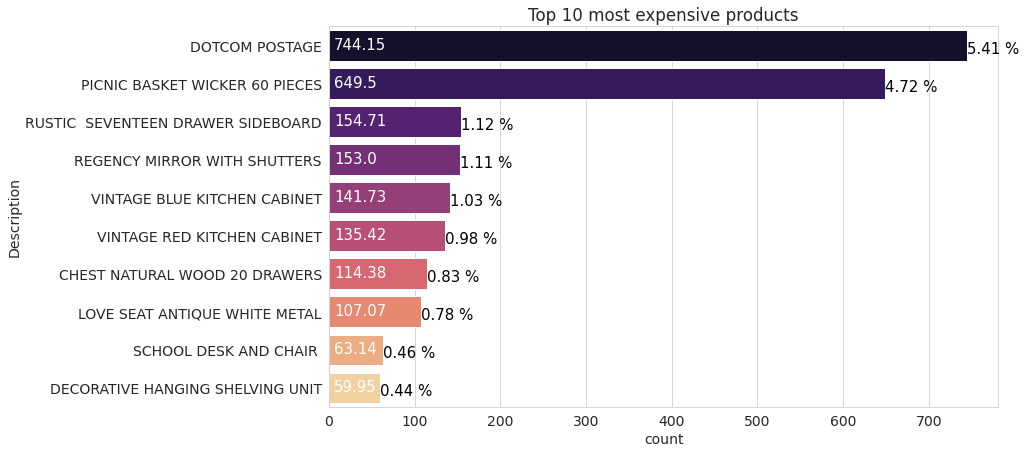

In [ ]:
# Bar plot
horizontal_nbar(series_name= avg_prod_amount, title_str= "Top 10 most expensive products", palette= 'magma')

In [ ]:
# bottom 10 cheap products
avg_prod_amount.tail(10)

Description
WRAP BAD HAIR DAY                      0.100000
PIECE OF CAMO STATIONERY SET           0.096615
PORCELAIN BUDAH INCENSE HOLDER         0.092005
BLUE STONES ON WIRE FOR CANDLE         0.084062
LETTER SHAPE PENCIL SHARPENER          0.068498
CARTOON  PENCIL SHARPENERS             0.067340
ESSENTIAL BALM 3.5g TIN IN ENVELOPE    0.065533
POPART WOODEN PENCILS ASST             0.042697
ASSTD DESIGN 3D PAPER STICKERS         0.028238
PADS TO MATCH ALL CUSHIONS             0.000750
dtype: float64

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 Most Expensive Products
- DOTCOM POSTAGE                    
- PICNIC BASKET WICKER 60 PIECES    
- RUSTIC  SEVENTEEN DRAWER SIDEBOARD
- REGENCY MIRROR WITH SHUTTERS      
- VINTAGE BLUE KITCHEN CABINET      
- VINTAGE RED KITCHEN CABINET       
- CHEST NATURAL WOOD 20 DRAWERS     
- LOVE SEAT ANTIQUE WHITE METAL     
- SCHOOL DESK AND CHAIR             
- DECORATIVE HANGING SHELVING UNIT  

>10 cheapest products
- WRAP BAD HAIR DAY                  
- PIECE OF CAMO STATIONERY SET       
- PORCELAIN BUDAH INCENSE HOLDER     
- BLUE STONES ON WIRE FOR CANDLE     
- LETTER SHAPE PENCIL SHARPENER      
- CARTOON  PENCIL SHARPENERS         
- ESSENTIAL BALM 3.5g TIN IN ENVELOPE
- POPART WOODEN PENCILS ASST         
- ASSTD DESIGN 3D PAPER STICKERS     
- PADS TO MATCH ALL CUSHIONS            

-----
**StockCode Name**

In [ ]:
# lets explore StockCode column
stock_freq = df['StockCode'].value_counts()
stock_freq.head(10)

85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
20725     1304
22720     1152
POST      1099
23203     1091
20727     1078
Name: StockCode, dtype: int64

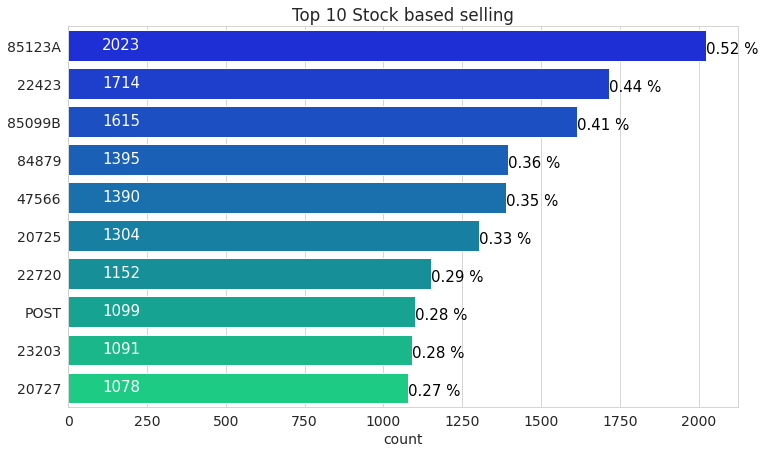

In [ ]:
# Bar plot of Top 10 most frequent produts, white text is actual value and black text for percentage
horizontal_nbar(series_name= stock_freq, title_str= "Top 10 Stock based selling", palette= 'winter')

In [ ]:
# least popular Stock based selling
stock_freq[stock_freq == min(stock_freq)]

90102     1
84550     1
90214Z    1
37471     1
22034     1
         ..
20678     1
90059D    1
90168     1
90169     1
23843     1
Name: StockCode, Length: 167, dtype: int64

# Country feature

In [ ]:
# lets check all unique country
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
# change 'EIRE' to 'Ireland' , 'RSA' to 'South Africa' and USA to United States
df['Country'] = df['Country'].replace(['EIRE', 'RSA', 'USA'], ['Ireland', 'South Africa', 'United States'])

In [ ]:
# Lets explore country feature
country_count = df['Country'].value_counts()
country_count

United Kingdom          349227
Germany                   9027
France                    8327
Ireland                   7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
United States              179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
South Africa                58
Lebanon                     45
Lithuani

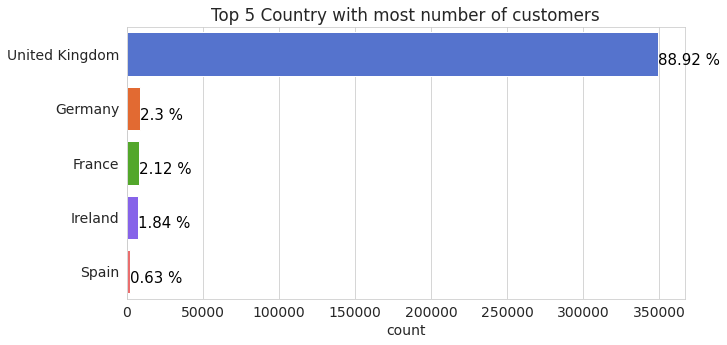

In [ ]:
# Bar plot Top 5 Country with most number of customers
horizontal_nbar(series_name= country_count, title_str= "Top 5 Country with most number of customers", 
         palette= None, percentage= True, count= False, n= 5, figsize_tup= (10,5))

* Country column is highly imbalanced and 88.92 % of customers are from UK 

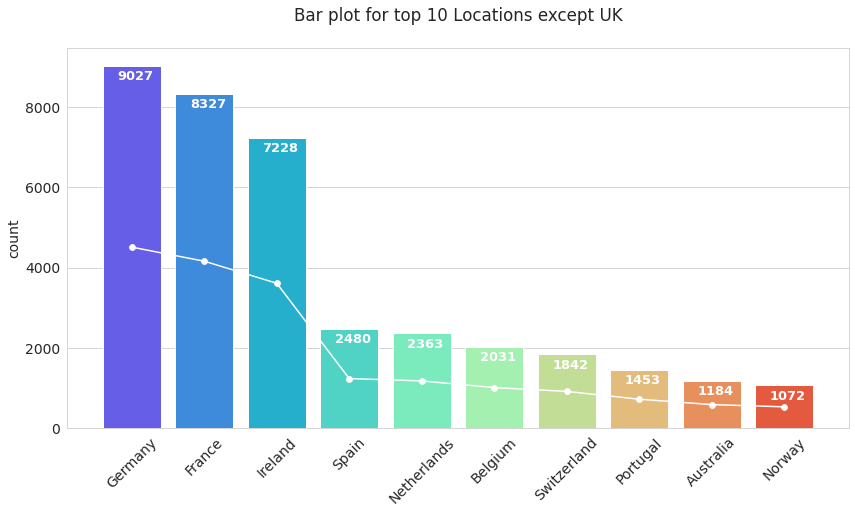

In [ ]:
plt.figure(figsize= (14,7))

# Bar plot for top 10 Locations except UK
sns.barplot(x= country_count.iloc[1:11].index, y= country_count.iloc[1:11].values, palette= 'rainbow')

# white line
sns.lineplot(x= country_count.iloc[1:11].index, y= country_count.iloc[1:11].values / 2 , color= 'white', marker= 'o')


for i, value in enumerate(country_count.iloc[1:11].values):
  
  # To write text on each bar of the bar plot
  plt.text(x= i- 0.2, y= value - 350, s= value, 
            fontsize= 13, weight='bold', color= 'white')

plt.title('Bar plot for top 10 Locations except UK\n')
plt.ylabel("count")
plt.xticks(rotation= 45);


* Since the company is based in the UK, most of its customers are from that country, followed by the top countries were also from Europe.

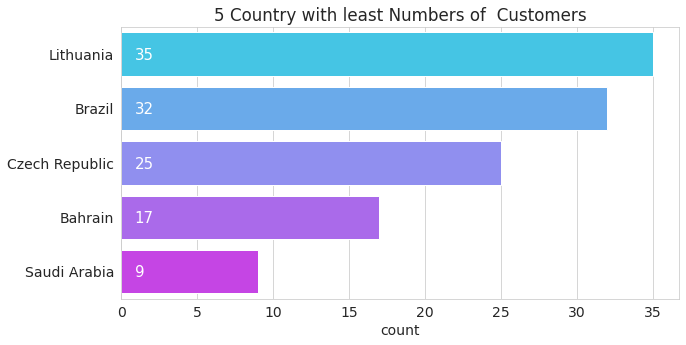

In [ ]:
# plot bottom 5 country name
horizontal_nbar(series_name= country_count[-5:], title_str= "5 Country with least Numbers of  Customers", 
         palette= 'cool', percentage= False, count= True, n= 5, figsize_tup= (10,5))

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

>Most of the customers are from
* United Kingdom         
* Germany                
* France                 
* Ireland                
* Spain                  

>Least number of customers from
* Lithuania              
* Brazil                 
* Czech Republic         
* Bahrain                
* Saudi Arabia   

241 customers from Unknown country.



In [ ]:
# all columsn
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'CohortDate',
       'InvoiceDate_Year', 'InvoiceDate_Month', 'CohortDate_Year',
       'CohortDate_Month', 'MonthName', 'Day', 'WeekdayName', 'Weekday',
       'Hour', 'Weekend', 'Quarter', 'TimeType', 'CohortPeriod'],
      dtype='object')

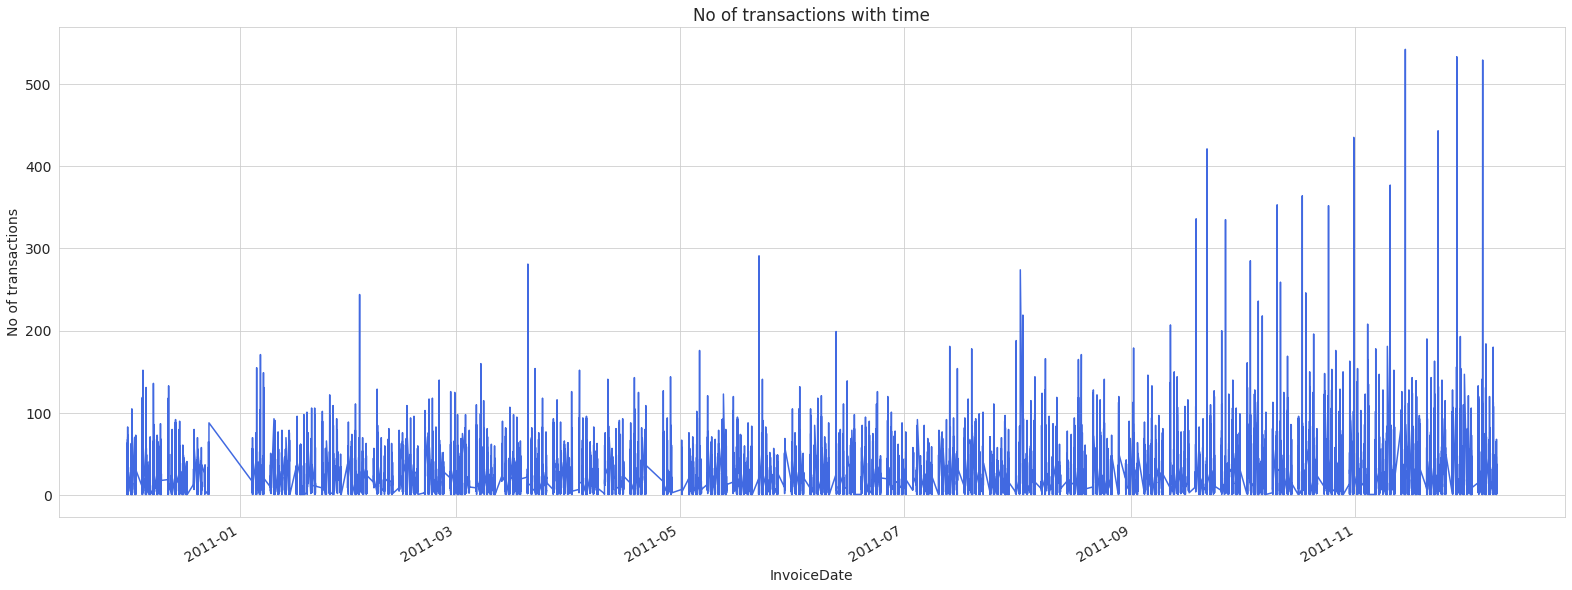

In [ ]:
# no of transaction with time
plt.figure(figsize= (27,10))
# gropuby Invoice date agg by count  
df.groupby('InvoiceDate').count()['InvoiceNo'].plot()
plt.ylabel('No of transactions')
plt.title("No of transactions with time");

- As time goes on, transitions will also increase.
- There is no transaction from January 2011 to February 2011.

----

**Months**

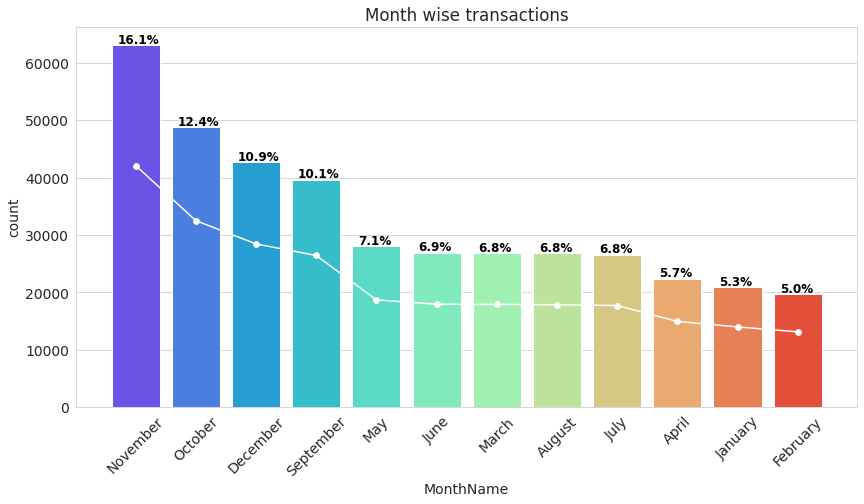

In [ ]:
# barplot of month with transactions
vertical_barplot(column= "MonthName", title_str= "Month wise transactions",  palette= 'rainbow')
    
plt.xticks(rotation= 45);

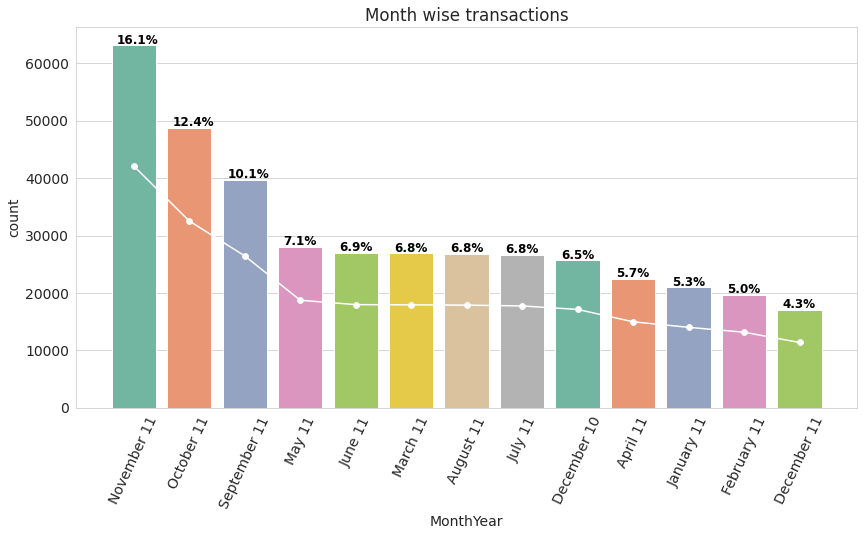

In [ ]:
# december contain two months (December 2011 and December 2010)
df['InvoiceDate_Year'] = df['InvoiceDate_Year'].astype(str)   # typecast to string
 
# Grab the last two digit of year and concatinate to month
df["MonthYear"] = np.vectorize(lambda x,y: x + ' ' + y[-2:] )(df['MonthName'], df['InvoiceDate_Year'])

 # barplot of month with transactions
vertical_barplot(column= "MonthYear", title_str= "Month wise transactions",  palette= 'Set2')
    
plt.xticks(rotation= 65);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

♦ *Most numbers of customers have purchased the gifts in the month of November, October and Septrmber.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.*

♦ *Least numbers of purchasing are in the month of December 2011 and February.*

---
**Week Day**

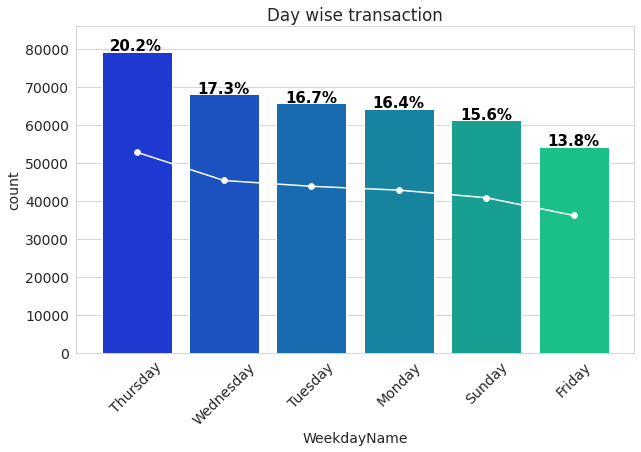

In [ ]:
# barplot of month with transactions
vertical_barplot(column= "WeekdayName", title_str= "Day wise transaction",  palette= 'winter',
                  figsize_tup= (10,6), font_size= 15)

plt.xticks(rotation= 45)
plt.ylim(0, 86000);               # increase ylim to display percentage

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<br/>


**Insights:**

- We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday at this point I have no idea why but there can be reasons porbably data is not availble for saturdays or no transactions happened on saturday.

- Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday.

-----
**Hour**

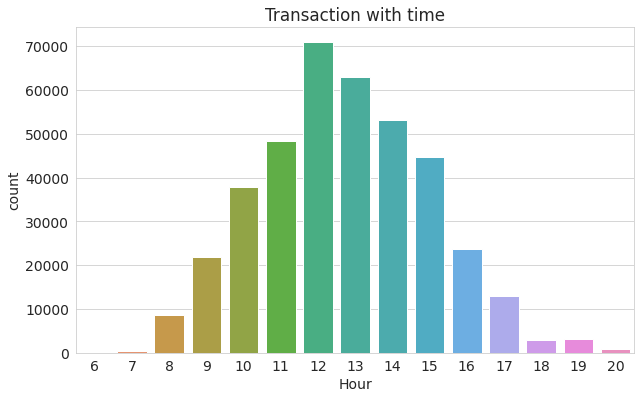

In [ ]:
plt.figure(figsize= (10,6))
sns.countplot(data= df, x= 'Hour').set_title('Transaction with time');



* From the above graph we can say that most numbers of purchasing is done between 10am to 3pm, and at 12 pm transaction is at its peak.
-----

**Lets Analyse Weekend, Year, TimeType and Quarter**

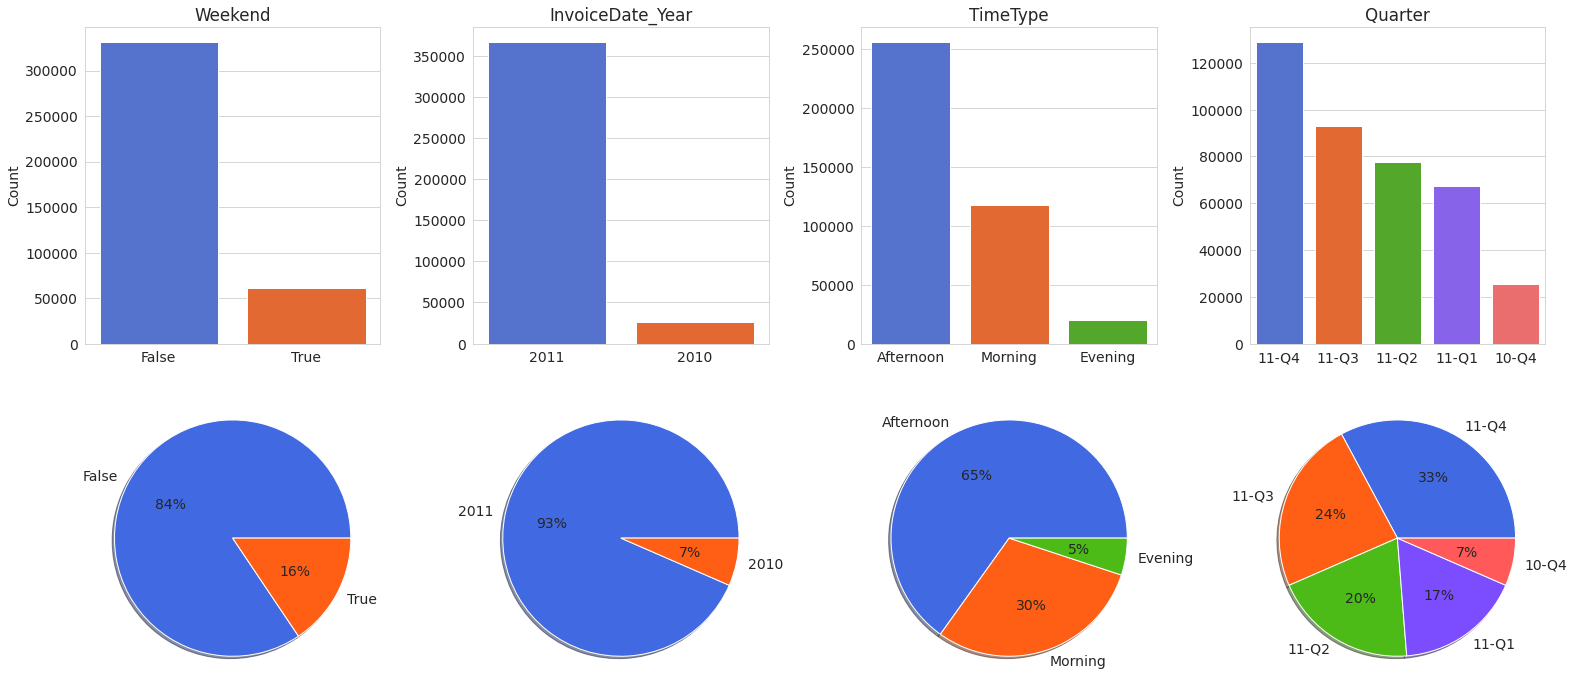

In [ ]:
list_of_concern = ['Weekend', 'InvoiceDate_Year', 'TimeType', 'Quarter']

# create a blank canvas
fig, axes = plt.subplots(nrows= 2, ncols= 4, figsize= (22, 10))

for i, col in enumerate(list_of_concern):

  col_index = df[col].value_counts().index
  col_val = df[col].value_counts().values
  # for I row to see count

  sns.barplot(x= col_index, y= col_val, ax= axes[0,i], order= col_index).set_title(col)  # we can also use countplot

  # set y-label in 1st row
  axes[0,i].set_ylabel("Count")
  # piechart for II  row to see percentage
  axes[1,i].pie(df[col].value_counts(), labels = df[col].value_counts().keys(),
                autopct='%.0f%%', shadow=True)


plt.tight_layout();

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<br/>


**Insights:**

>Weekend
- *There are 2 weekend in a week, (2/7) which is 28.5% but here only weekend transaction is 16% means there is less purchase on weekend than other day.*

>Year
-  Most of the transactions from year 2011 compare to 2010.

>Time Type
- *Most of the customers have purchased the items in Afternoon.*
- *Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.To increasse transacction at evening we can do one thing provide the offers/discounts at evening* 

>Quarter
- 4th Quarter in 2011 have most number of the transaction,first quarter have least number of transactions.
- 4th Quarter in 2010 have only one month. 

----

Let's visualize the numerical features


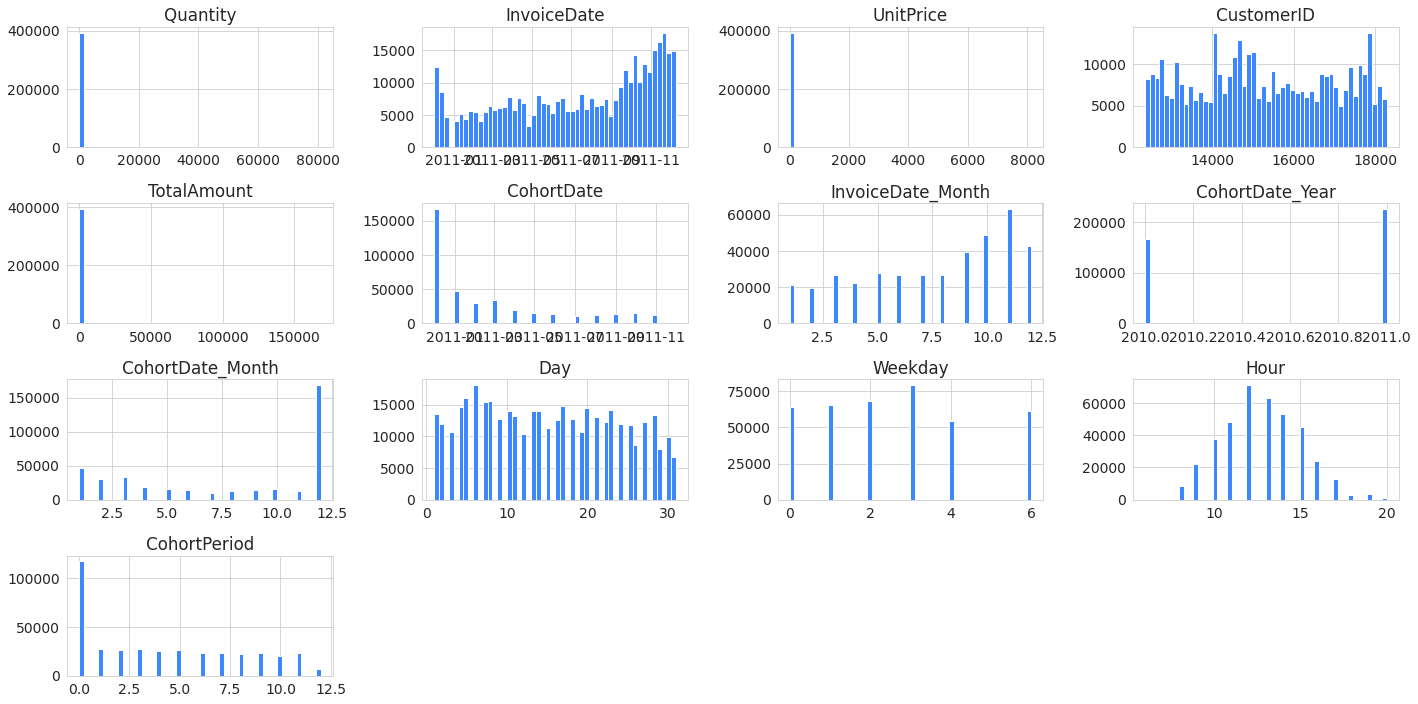

In [ ]:

# plot of histogram 
df.hist(bins= 50, figsize= (20,10), color=  '#3d87ff')
# add title
plt.title("Histogram for each numerical attribute.", fontsize= 18)
# to prevent overlapping of text in plot
plt.tight_layout()
plt.show();

**Quantity , Unit price and Total Amount are the columns of concern.**
  * This histogram suggests that they are highly skewed.

In [ ]:
def identity(x) : return x     # Identity function

# dict of fonctions with name
my_functions = {
    "" : identity,                # empty string 
    "cube root" : np.cbrt,
    "log": np.log1p                # for handle log(0) , log1p will add 1 then apply log 
     }     
 

def hist_QQ_diagnosis(feature, title, data=df, figsize= (24,15), func_dict= my_functions):
  """
  Box-plot, histogram and QQ plot of a distibution with all diffrent- diffrent functions.
  """

  n_cols = len(func_dict)  # number of colums in plot
  fig, axes = plt.subplots(nrows= 3, ncols= n_cols,  figsize= figsize, 
                           gridspec_kw={'height_ratios': [1, 3, 3]})
  
  for i, (name, func) in enumerate(func_dict.items()):

    # apply function to series
    transformed = np.vectorize(func)(data[feature])

    # box-plot , add name of function to title
    sns.boxplot(x= transformed, ax= axes[0,i]).set_title(name + " " + title)
    # For distplot on 
    sns.distplot(transformed, ax= axes[1,i])
    # For Probability plot 
    _ = sp.stats.probplot(transformed,
                          plot=axes[2,i])

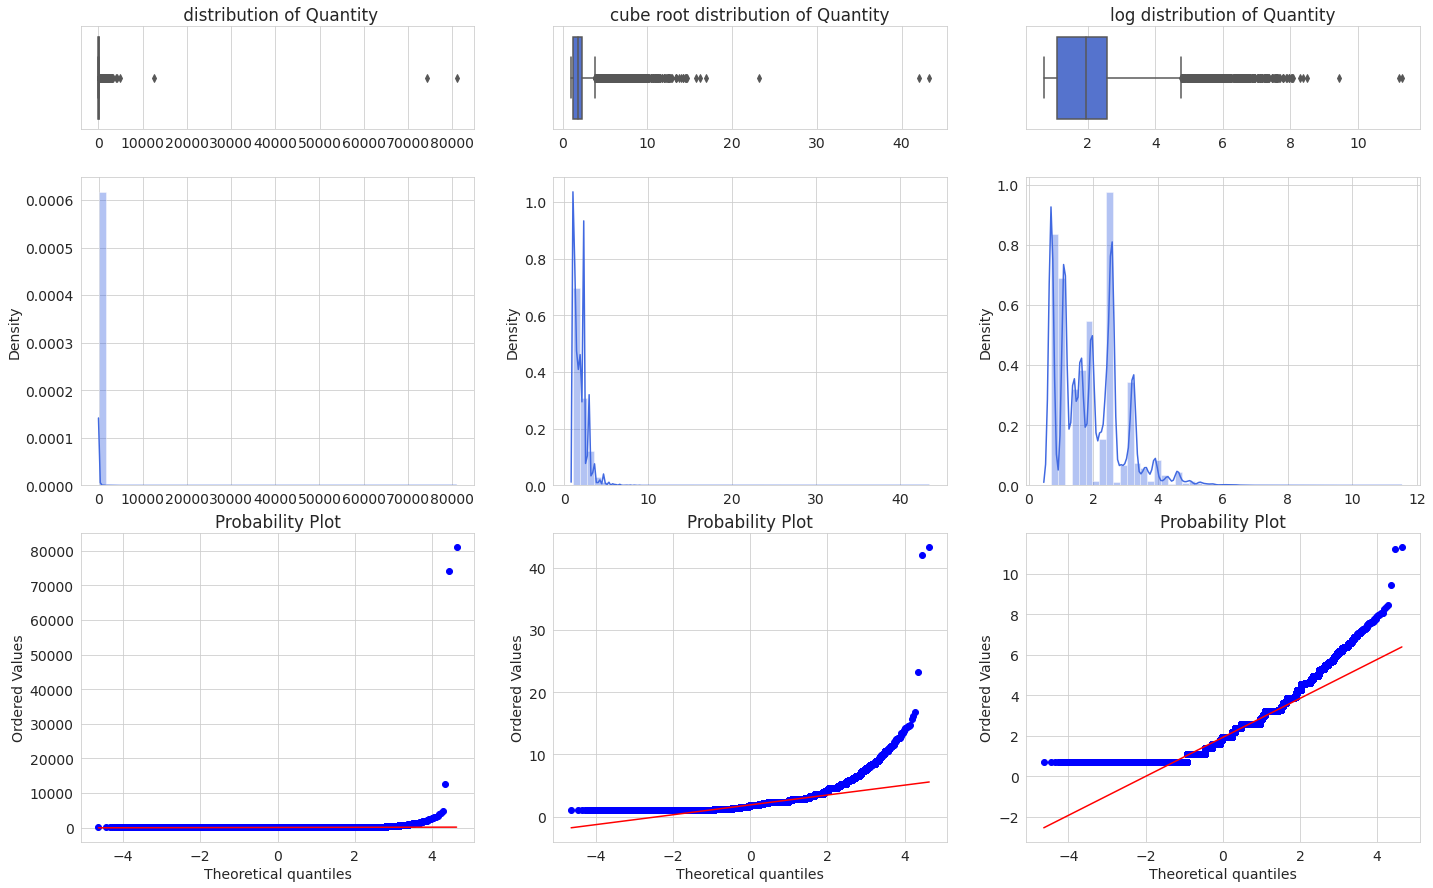

In [ ]:
# distribution of Quantity
hist_QQ_diagnosis(feature= 'Quantity',title= 'distribution of Quantity')

**Here we can see that Quantity a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution**

----
**Unit Price**

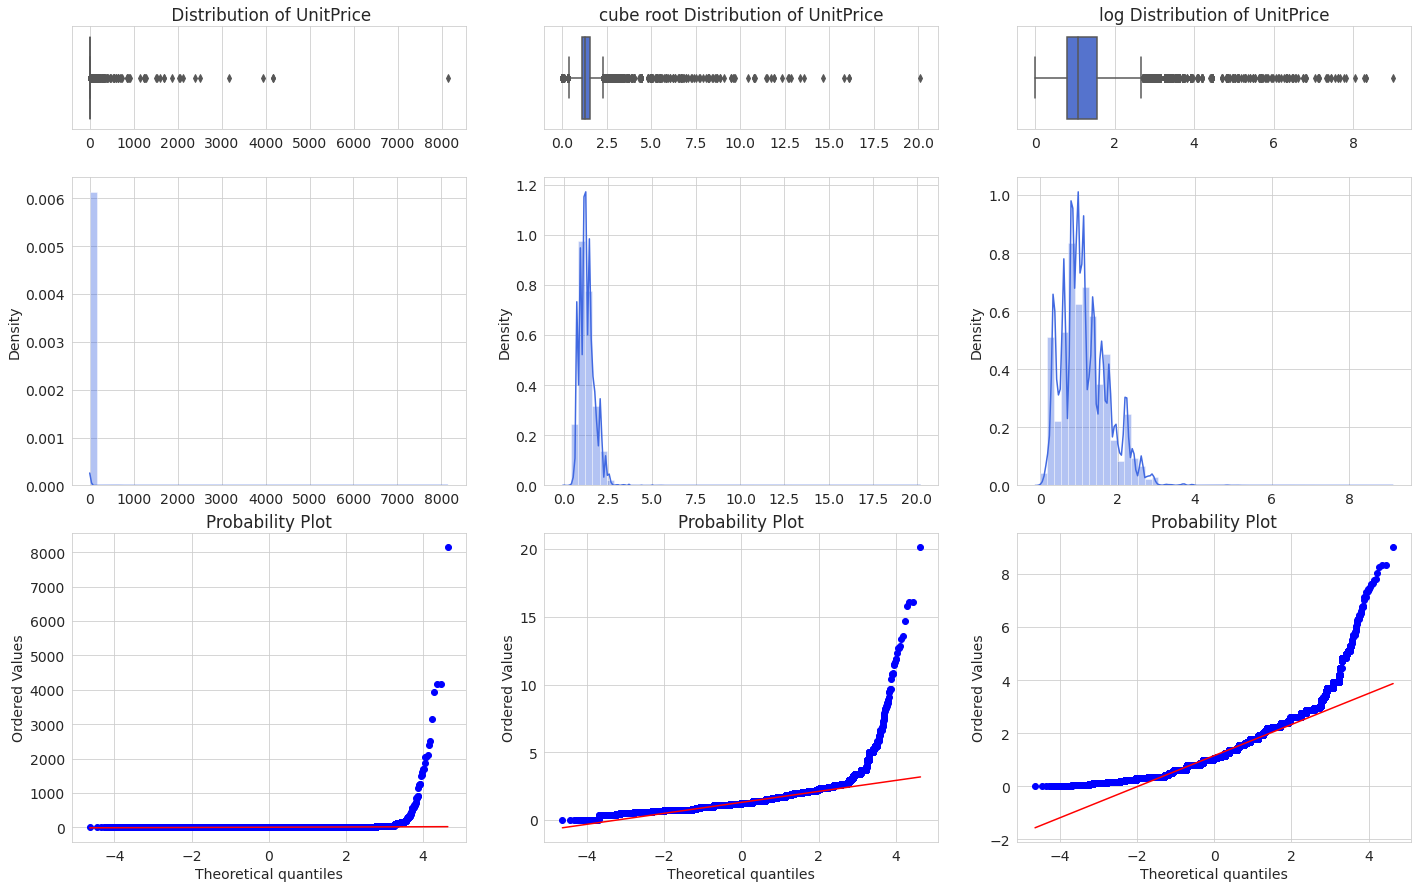

In [ ]:
# Distribution of UnitPrice
hist_QQ_diagnosis(feature='UnitPrice', title= "Distribution of UnitPrice")



*From the distribution of unit price, we can say that most items have a lower price range.*

----
**TotalAmount**

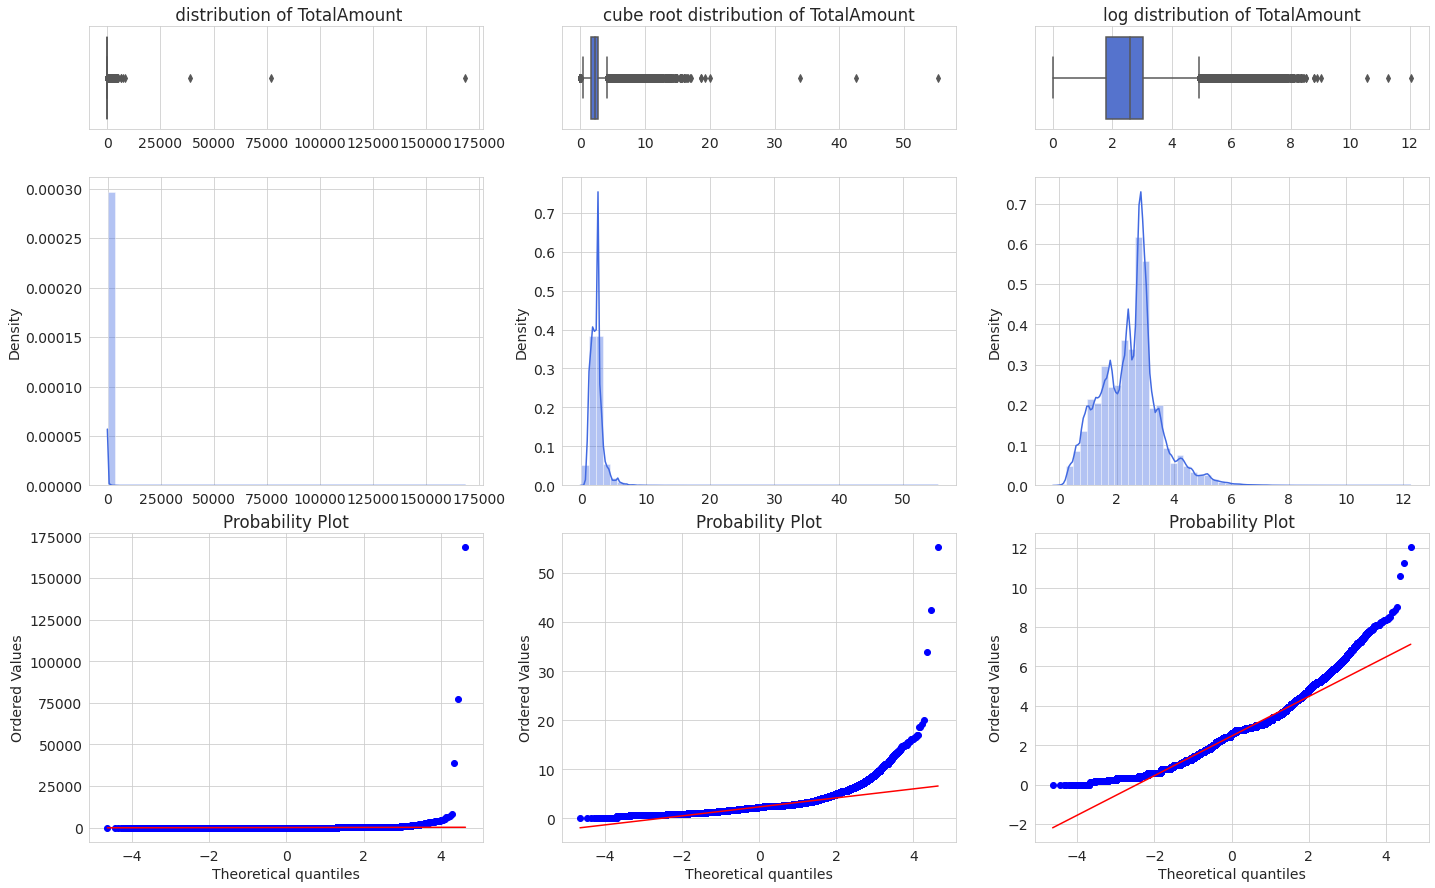

In [ ]:
# distribution of TotalAmount
hist_QQ_diagnosis(feature= 'TotalAmount',title= "distribution of TotalAmount")

# Create the RFM model (Recency, Frequency,Monetary value)

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.
RFM stands for the three dimensions:

    Recency – How recently did the customer purchase?
    Frequency – How often do they purchase?
    Monetary – How much do they spend?

**Recency** - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

**Frequency** - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

**Monetary** - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.


![](https://www.prospectsoft.com/prs-main/sitenews/blogimages/rfm-metrics.png?nocache=161456&action=download)

In [ ]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (Latest_Date - x.max()).days,    # Latest_Date - Recent date of intraction for each customers 
    'InvoiceNo': 'count',                                     # No of transaction (InvoiceNo) per Customers
    'TotalAmount': 'sum'                                       # Sum of Total amount for each customer
    })

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          18         73   1757.55
12350.0         310         17    334.40

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetary   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [ ]:
#Descriptive Statistics
rfm_df.describe()

Recency    Frequency       Monetary
count  4339.000000  4339.000000    4339.000000
mean     92.041484    90.512100    2048.215924
std     100.007757   225.515328    8984.248352
min       0.000000     1.000000       0.000000
25%      17.000000    17.000000     306.455000
50%      50.000000    41.000000     668.560000
75%     141.500000    98.000000    1660.315000
max     373.000000  7676.000000  280206.020000

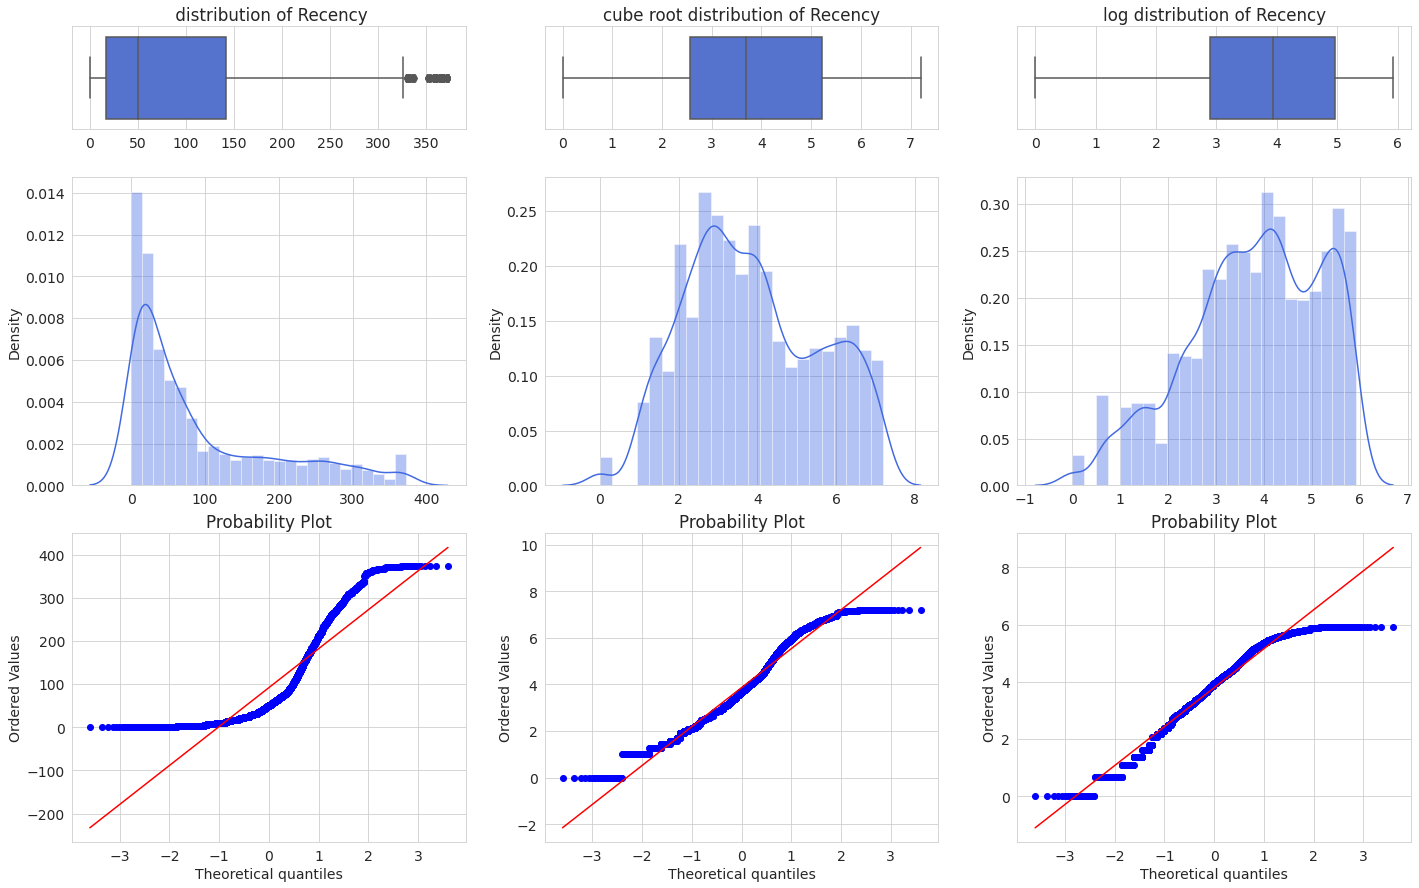

In [ ]:
# distribution of Recency
hist_QQ_diagnosis(feature= 'Recency',title= 'distribution of Recency', data = rfm_df)

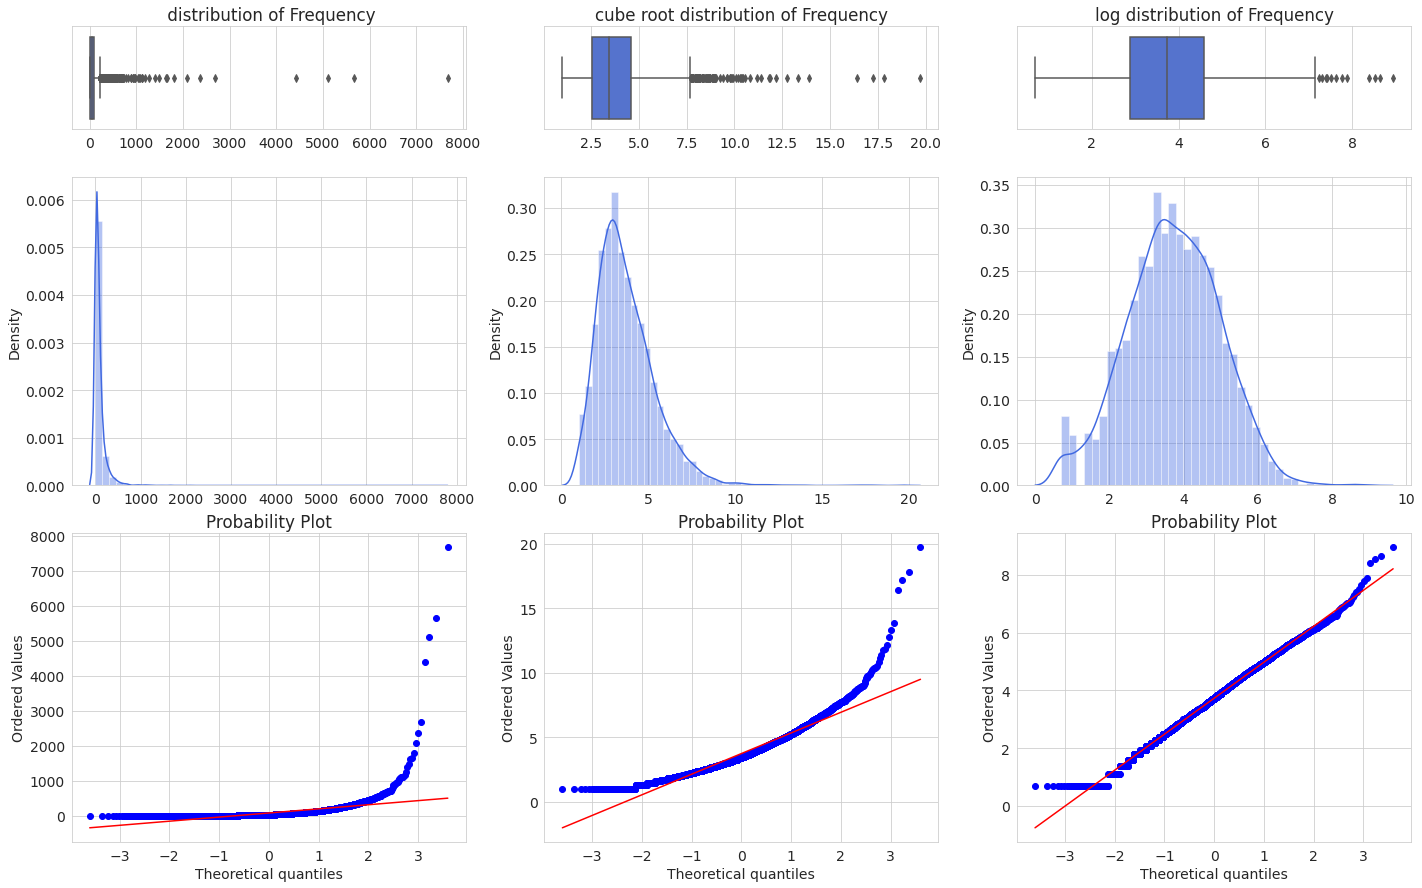

In [ ]:
# distribution of Frequency
hist_QQ_diagnosis(feature= 'Frequency',title= 'distribution of Frequency', data = rfm_df)

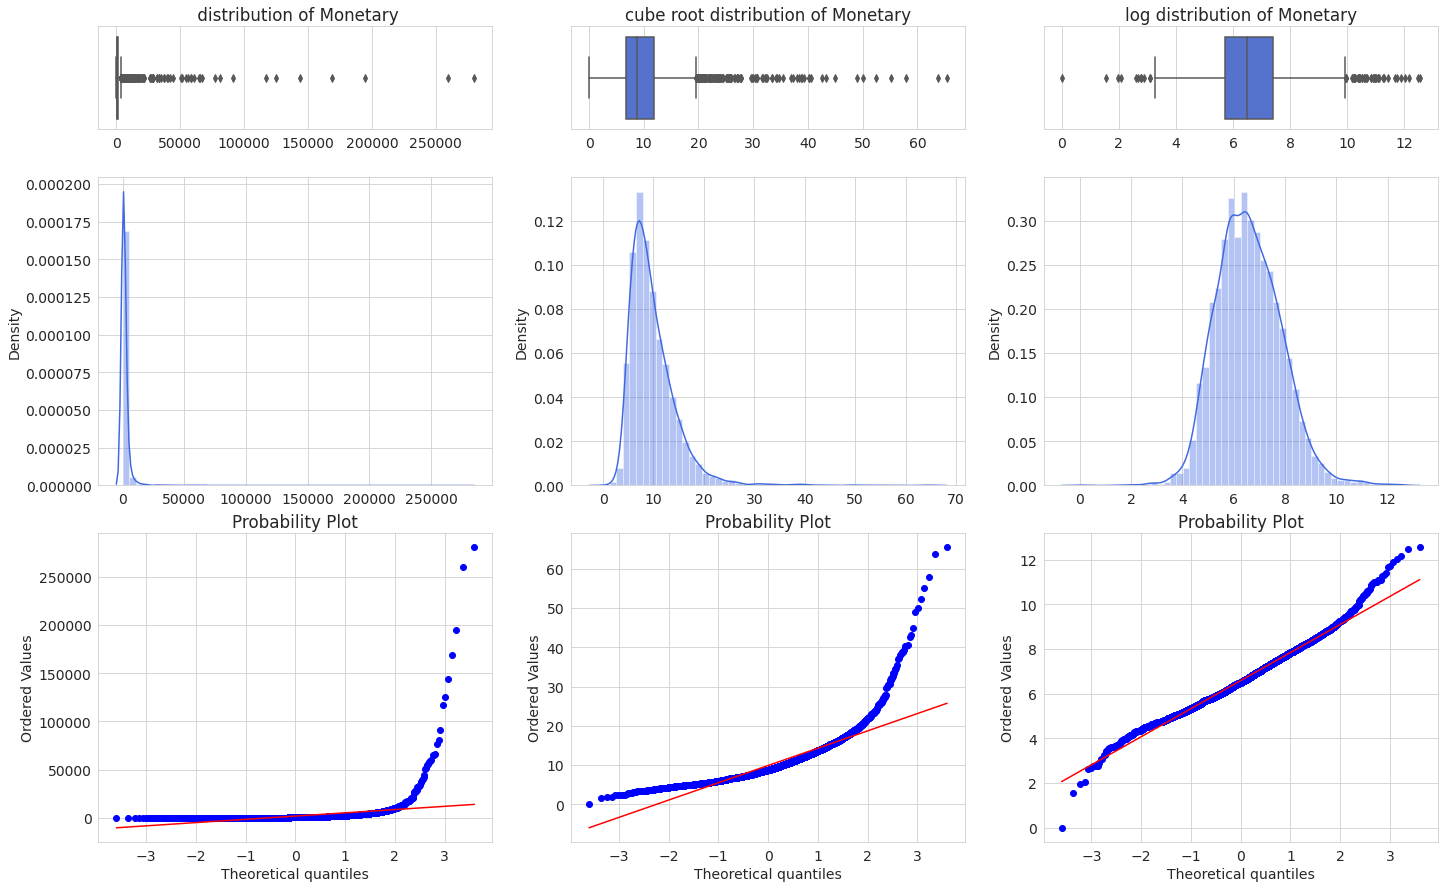

In [ ]:
# distribution of Monetary
hist_QQ_diagnosis(feature= 'Monetary', title= 'distribution of Monetary', data = rfm_df)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<br/>


**Insights:**

* For monetary and frequency logarithmic transformations have better performance to reduce skewness, but for recency cube root transformation has relatively better performance than the logarithmic one.


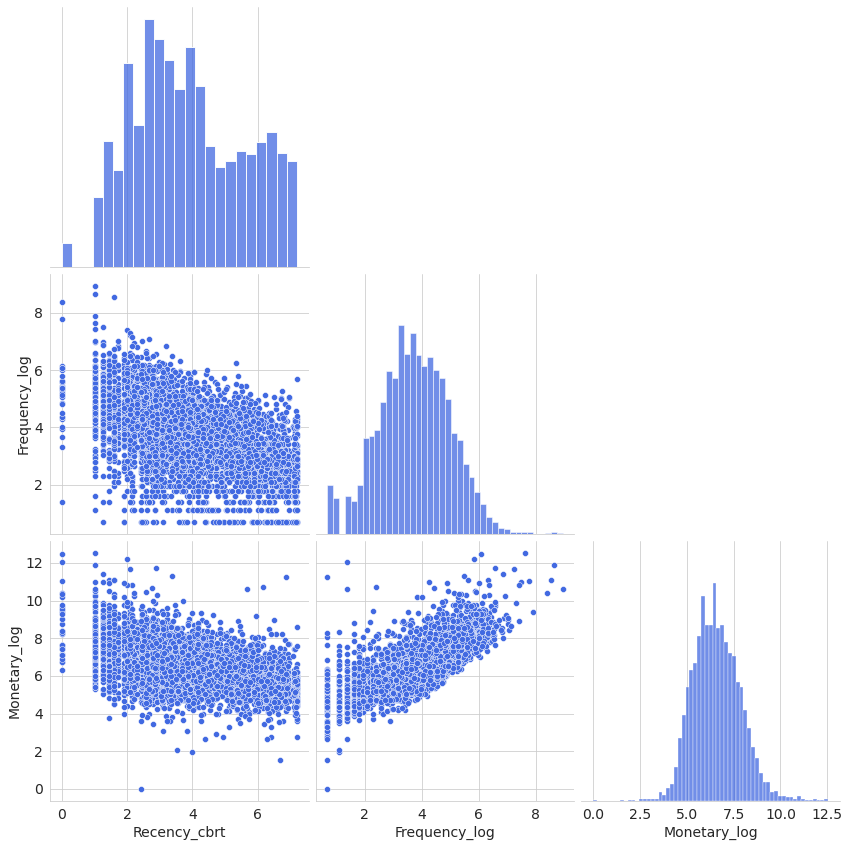

In [ ]:
# Transformation
rfm_df['Recency_cbrt'] = rfm_df['Recency'].apply(np.cbrt)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(np.log1p)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(np.log1p)

# lets analyze  in pairplot
subset_rfm_cols = ['Recency_cbrt', 'Frequency_log', 'Monetary_log']

sns.pairplot(rfm_df[subset_rfm_cols], corner=True, size= 4 );


**Splitting into four segments using quantiles.**

In [ ]:
#Split into four segments using quantiles
quantiles_rfm = rfm_df.quantile(q=[0,.2,.4,.6,.8,1])
quantiles_rfm = quantiles_rfm.to_dict()
pd.DataFrame(quantiles_rfm)

Recency  Frequency    Monetary  Recency_cbrt  Frequency_log  Monetary_log
0.0      0.0        1.0       0.000      0.000000       0.693147      0.000000
0.2     13.2       14.0     248.844      2.361857       2.708050      5.520836
0.4     32.0       29.0     487.118      3.174802       3.401197      6.190557
0.6     71.0       57.0     933.202      4.140818       4.060443      6.839693
0.8    179.0      120.0    2054.820      5.635741       4.795791      7.628430
1.0    373.0     7676.0  280206.020      7.198405       8.945984     12.543284

In [ ]:
# Calculate  R, F and M segment value columns in the existing dataset to show R, F and M segment values
# good customers get high RFM score , best score is 555 

# using pandas qantile-cut technique
# lesser the recency higher the score
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=5, labels= np.arange(5,0,-1))  
# higher the frequency value higher the score
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=5, labels= np.arange(5) + 1)
# more the monetary value higher the score
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=5, labels= np.arange(5) + 1)

rfm_df.head()

Recency  Frequency  Monetary  Recency_cbrt  Frequency_log  \
CustomerID                                                              
12346.0         325          1  77183.60      6.875344       0.693147   
12347.0           2        182   4310.00      1.259921       5.209486   
12348.0          75         31   1797.24      4.217163       3.465736   
12349.0          18         73   1757.55      2.620741       4.304065   
12350.0         310         17    334.40      6.767899       2.890372   

            Monetary_log  R  F  M  
CustomerID                         
12346.0        11.253955  1  1  5  
12347.0         8.368925  5  5  5  
12348.0         7.494564  2  3  4  
12349.0         7.472245  4  4  4  
12350.0         5.815324  1  2  2

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = np.vectorize(lambda x,y,z: str(x) + str(y) + str(z))(rfm_df['R'], rfm_df['F'], rfm_df['M'])   
# OR
# rfm_df['RFMGroup'] = np.vectorize(lambda x,y,z: str(100*x + 10*y + z))(rfm_df['R'], rfm_df['F'], rfm_df['M'])

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
# I am doing Simple sum but , But We can also do weighted sum for Important features
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  Recency_cbrt  Frequency_log  \
CustomerID                                                              
12346.0         325          1  77183.60      6.875344       0.693147   
12347.0           2        182   4310.00      1.259921       5.209486   
12348.0          75         31   1797.24      4.217163       3.465736   
12349.0          18         73   1757.55      2.620741       4.304065   
12350.0         310         17    334.40      6.767899       2.890372   

            Monetary_log  R  F  M RFMGroup  RFMScore  
CustomerID                                            
12346.0        11.253955  1  1  5      115         7  
12347.0         8.368925  5  5  5      555        15  
12348.0         7.494564  2  3  4      234         9  
12349.0         7.472245  4  4  4      444        12  
12350.0         5.815324  1  2  2      122         5

* RFMScore follow hierarchy of natural number  best Score is 15 and least score is 3.
* Note -> There is no natural number hierarchy in this RFMGroup eg. We cannot say RFMGrop 151 > 115 , here both numbers have different meaning
* The best customer group is 555 and the worst customer group is 111.

----
RFMScore 

In [ ]:
def line_plot(x, y , title, xlabel, ylabel, points = True, figsize= (12,8)):
  """
  lineplot custom function
  """

  plt.figure(figsize=figsize)

  # pointplot
  if points: 
    sns.pointplot(y= y , x= x)
  
  else:
    # line plot without points
    sns.lineplot(y= y, x= x)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

In [ ]:
def donut_chart(data, col, title):

  #labels
  lab = data[col].value_counts().keys().tolist()
  #values
  val = data[col].value_counts().values.tolist()

  # data for plot
  data_plot = go.Pie(labels = lab ,
                values = val ,
                marker = dict(line = dict(color = "white",
                                          width =  1.3)
                              ),
                rotation = 90,
                hoverinfo = "label+value+text",
                hole = .6
                )
  # layout for tile
  layout = go.Layout(dict(title = "RFMScore with its count",
                          plot_bgcolor  = "rgb(243,243,243)",
                          paper_bgcolor = "rgb(243,243,243)",
                        )
                    )


  fig = go.Figure(data = [data_plot],layout = layout)
  # iplot for ipython kernel
  iplot(fig)

In [ ]:
donut_chart(data= rfm_df, col= 'RFMScore', title= "RFMScore with Number and Percentage of customers")

**Assign tier to each customer , based on RFMScore**

In [ ]:
# Assign tier to each customer , based on RFMScore
tier_list = ['Bronze',  'Silver', 'Gold' ]  #  wrost to best

# divide RFMScore into 3 quantiles and assign the tier
rfm_df['RFMScore_tier'] = pd.qcut(rfm_df['RFMScore'], q = 3, labels = tier_list)

rfm_df.head()

Recency  Frequency  Monetary  Recency_cbrt  Frequency_log  \
CustomerID                                                              
12346.0         325          1  77183.60      6.875344       0.693147   
12347.0           2        182   4310.00      1.259921       5.209486   
12348.0          75         31   1797.24      4.217163       3.465736   
12349.0          18         73   1757.55      2.620741       4.304065   
12350.0         310         17    334.40      6.767899       2.890372   

            Monetary_log  R  F  M RFMGroup  RFMScore RFMScore_tier  
CustomerID                                                          
12346.0        11.253955  1  1  5      115         7        Bronze  
12347.0         8.368925  5  5  5      555        15          Gold  
12348.0         7.494564  2  3  4      234         9        Silver  
12349.0         7.472245  4  4  4      444        12          Gold  
12350.0         5.815324  1  2  2      122         5        Bronze

In [ ]:
# to see percentage of customers in each tier
donut_chart(data= rfm_df, col= 'RFMScore_tier', title= "Number of customers per Tier")

In [ ]:
# groupby RFMScore_tier  to find RFMScore per tier
rfm_df.groupby('RFMScore_tier')['RFMScore'].max()

RFMScore_tier
Bronze     7
Silver    11
Gold      15
Name: RFMScore, dtype: int64

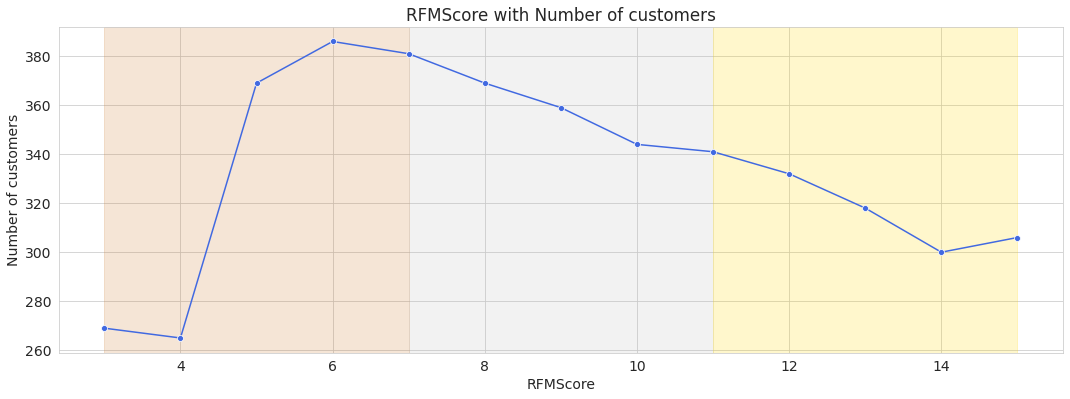

In [ ]:
# pointplot (lineplot with marker)
fig, ax = plt.subplots(figsize= (18,6))
sns.lineplot(x= rfm_df['RFMScore'].value_counts().index, y= rfm_df['RFMScore'].value_counts().values,
             ax= ax, marker = 'o').set_title("RFMScore with Number of customers")

# set x and y label
ax.set_xlabel(xlabel= "RFMScore")
ax.set_ylabel("Number of customers")

# fill the color 
# between 3 to 7 rfm score represent Bronze tier
ax.axvspan(3, 7, alpha=0.2, color='#CD7F32')
# between 7 to 11 rfm score represent Silver tier
ax.axvspan(7, 11, alpha=0.2, color='#C0C0C0')
# between 11 to 15 rfm score represent Gold tier
ax.axvspan(11, 15, alpha=0.2, color='#FFD700')

plt.show();

- After 4 RFM score there is a sudden increase in the number of customers with more than 4 RFM score but after some, it gradually decreases.
- most of the customers get rfm score between 5 to 8.


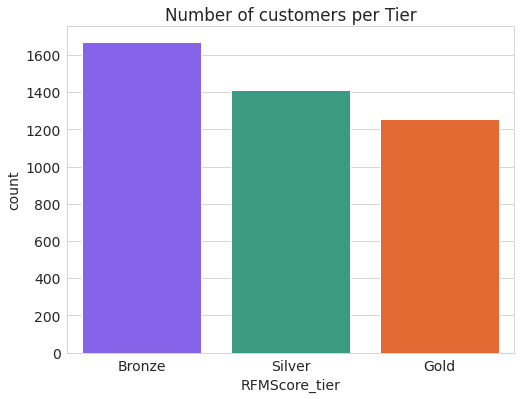

In [ ]:
# Number of customers per Tier
plt.figure(figsize=(8,6))
sns.countplot(data= rfm_df, x = 'RFMScore_tier',
             palette= [ '#7C4DFF', '#2AAA8A', '#FF5F15'] ).set_title("Number of customers per Tier");

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<br/>


**Insights:**

* Most of the customers are from Bronze tier and the least from Gold.
* There are 1670 customers in the Bronze tier which is 38.5% of the total customers.
* Silver tier have 1413 customers which is 32.6% of the total customers.
* Gold tier have 1256 customers which is 28.9% of the total customers.


In [ ]:
# add new item in our list 
subset_rfm_cols.append('RFMScore_tier')

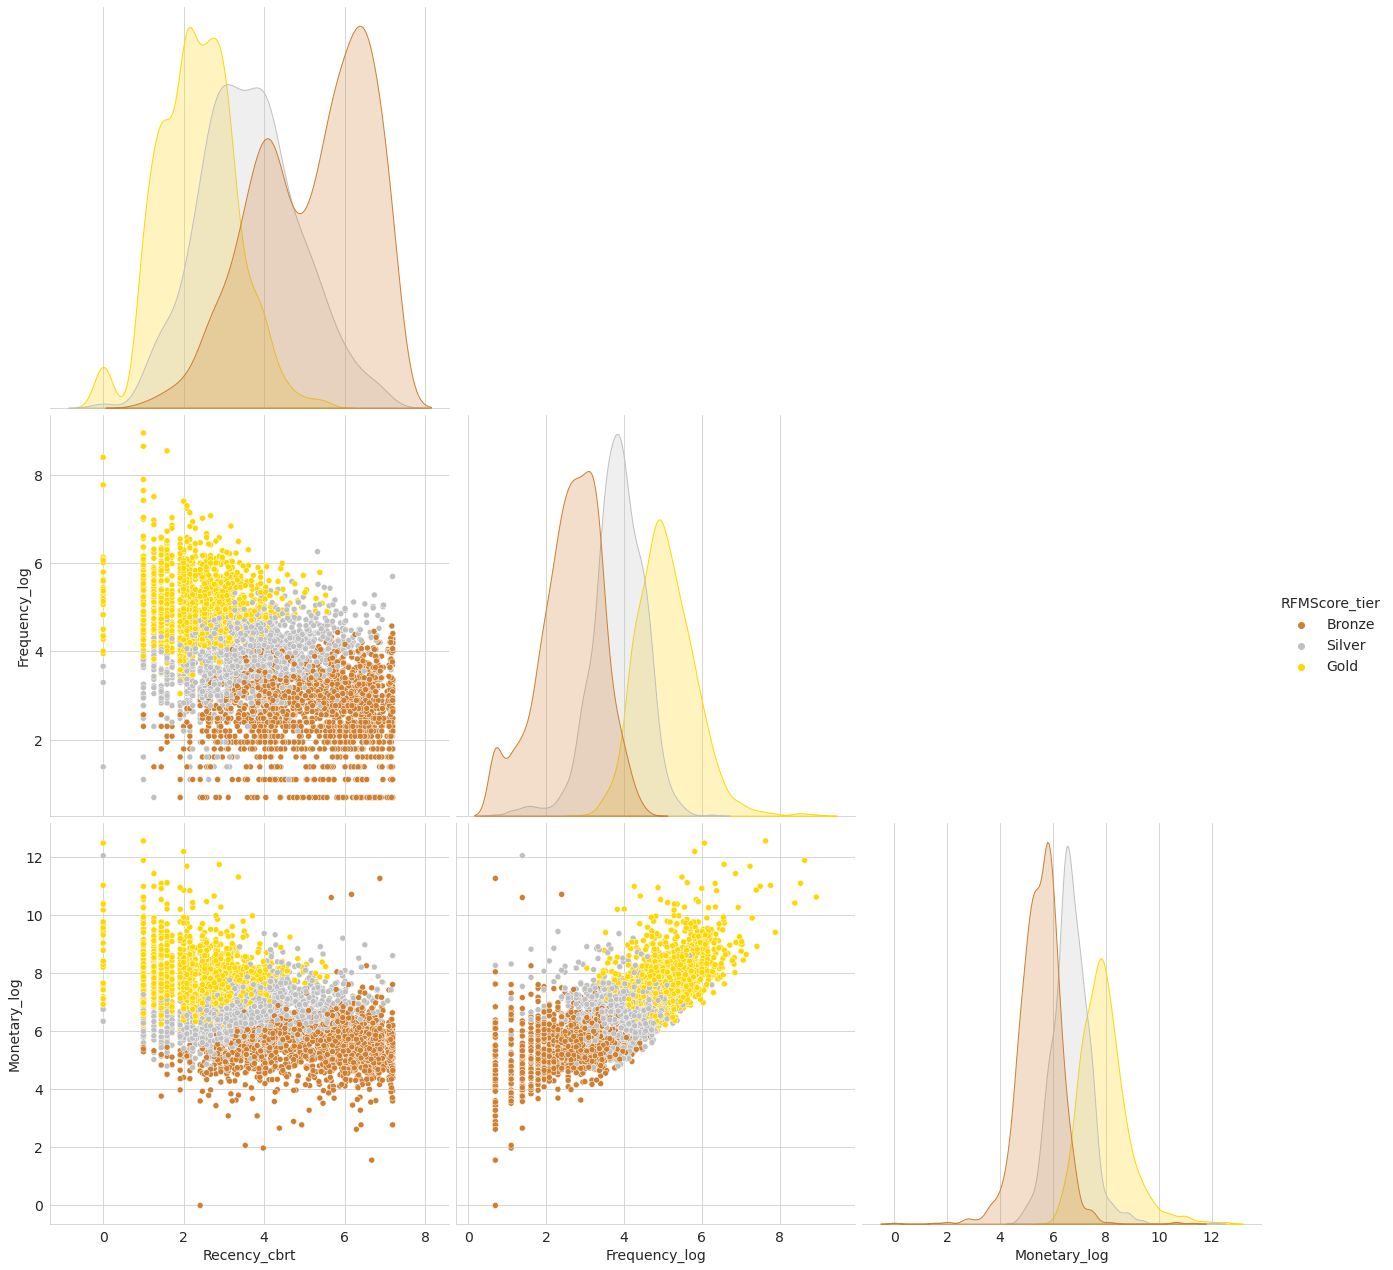

In [ ]:
# pairplot per hue
sns.pairplot(rfm_df[subset_rfm_cols], corner=True, size=6, hue= 'RFMScore_tier', palette = ['#CD7F32', '#C0C0C0', '#FFD700']);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<br/>


**Insights:**

* In the lower triangular grid, a scatter plot between the cuberoot of recency, the log of frequency, and monetary,hue colored by tier of customers.
* In a diagonal grid, a histogram of the cuberoot of recency, frequency and log of currency, hue colored by customers.

In [ ]:
# 3-d scatter plot 

def scatter3d_plot(data, col1, col2, col3, color, title):
  """3d-scatterplot in plotly"""

  fig = px.scatter_3d(data , x= col1, y=col2 , z= col3,
                      title=title, color=color)
  # marker size 
  fig.update_traces(marker_size = 4)
  fig.show()

  # save as html file for visulize in big screen
  fig.write_html(f"{title}.html")




# scatter plot wrt tier of customers
scatter3d_plot(data= rfm_df, col1='Recency_cbrt', col2='Frequency_log', col3='Monetary_log',
                color='RFMScore_tier', title= 'RFMScore with tier')

* 3 bronze points outside the genral trends have very high monetary values, but due to low frequency and high recency values the fall under bronze category.
* One point outside the genral trends have very high monetary values and have minimum recency value but due to very low frequency it fall under silver tier.

# **Clustering In Machine Learning**

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html

<br/>

<img src="https://i.imgur.com/VbVFAsg.png" width="640">


## *K-Means Clustering*

Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.

KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method can be used. These methods will help in selection of the optimum number of clusters.

![](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)


<br/>

### *Silhouette score method:*

 Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

*  Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

 The Silhouette Coefficient for a sample is $$ S = \frac{(b - a)}{max(a, b)}$$

<br/>


Silhouette Score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

### *Elbow Method:*

Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

<br/>

<img src="https://miro.medium.com/max/1340/1*RnvrdhlUxHWss3vOffHT5g.png" width="400">

<br/>




## Applying K-Silhouette Method on Recency, Frequency and Monetary

In [ ]:
# Importing libraries necessary for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm

In [ ]:
# list of features we select for clustring
feature_vector= ['Recency_cbrt', 'Frequency_log', 'Monetary_log']


feature_df = rfm_df[feature_vector].copy()

feature_df.head()

Recency_cbrt  Frequency_log  Monetary_log
CustomerID                                           
12346.0         6.875344       0.693147     11.253955
12347.0         1.259921       5.209486      8.368925
12348.0         4.217163       3.465736      7.494564
12349.0         2.620741       4.304065      7.472245
12350.0         6.767899       2.890372      5.815324

In [ ]:
# Use standardScaler to scale the data
scaler = StandardScaler()

# fit and transform the data
scaled_X = scaler.fit_transform(feature_df)

### Applying Silhouette Method on Recency, Frequency and Monetary

**Let's Visulize with SilhouetteVisualizer**

For n_clusters = 2, silhouette score is 0.39510315226424325


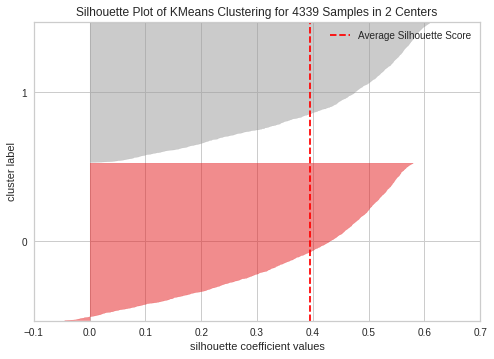

For n_clusters = 3, silhouette score is 0.31491703906461105


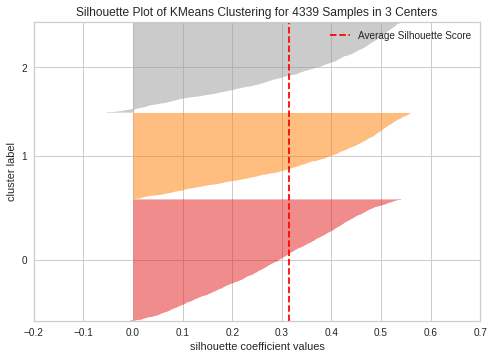

For n_clusters = 4, silhouette score is 0.3023368508833556


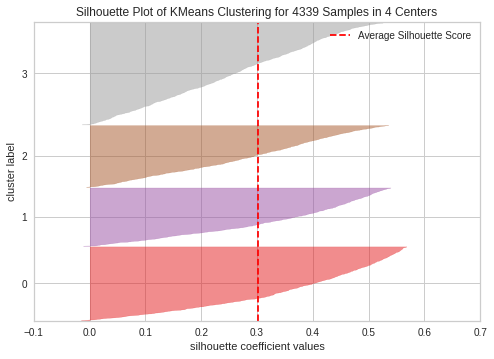

For n_clusters = 5, silhouette score is 0.2923939608609667


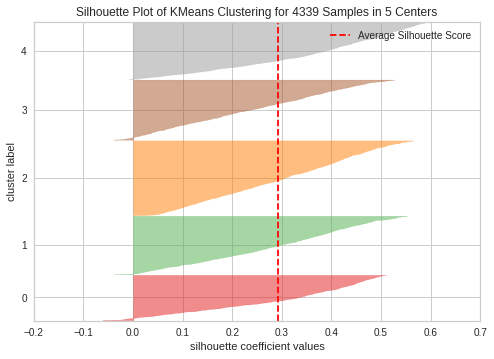

For n_clusters = 6, silhouette score is 0.2826024245096761


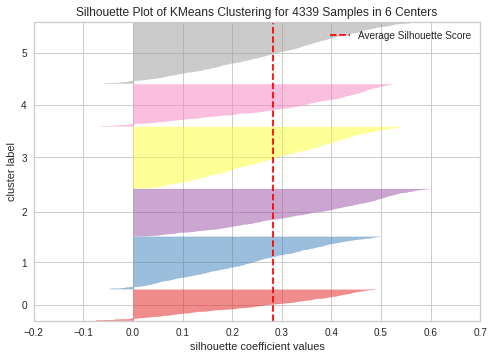

For n_clusters = 7, silhouette score is 0.26333955500776346


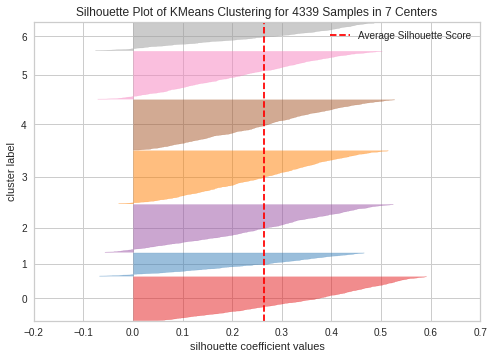

For n_clusters = 8, silhouette score is 0.25469176537932


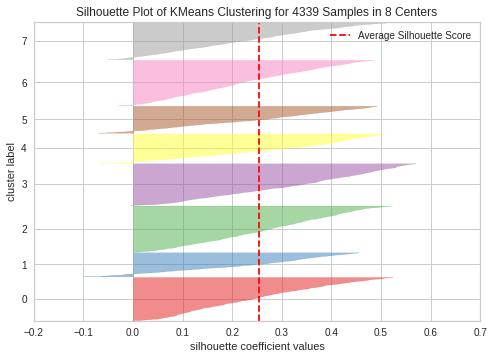

For n_clusters = 9, silhouette score is 0.24909326520261416


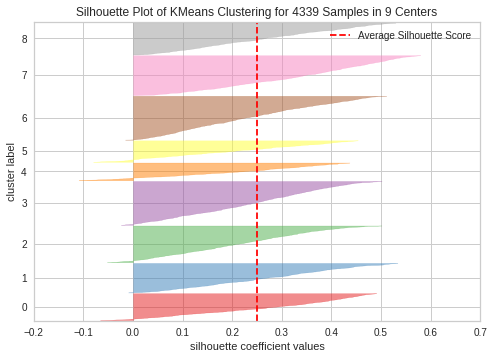

For n_clusters = 10, silhouette score is 0.2565406862423761


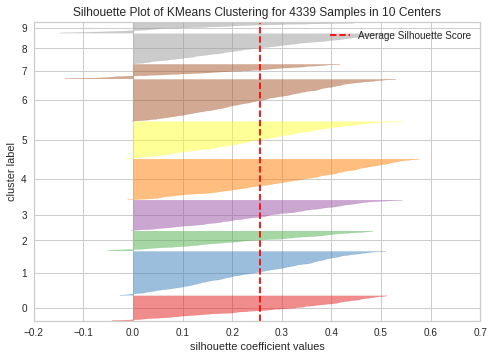

For n_clusters = 11, silhouette score is 0.2559409336111213


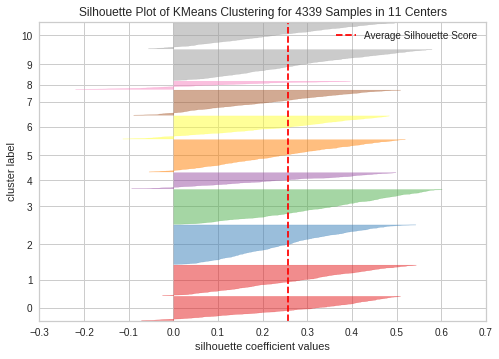

For n_clusters = 12, silhouette score is 0.2552574033753868


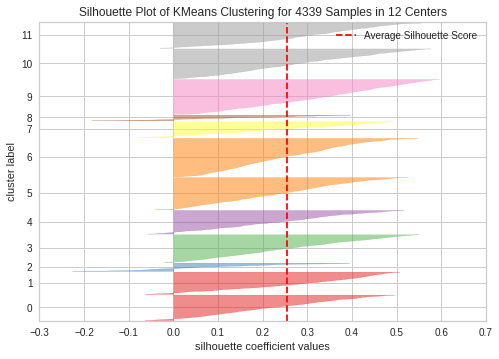

For n_clusters = 13, silhouette score is 0.2519612678489915


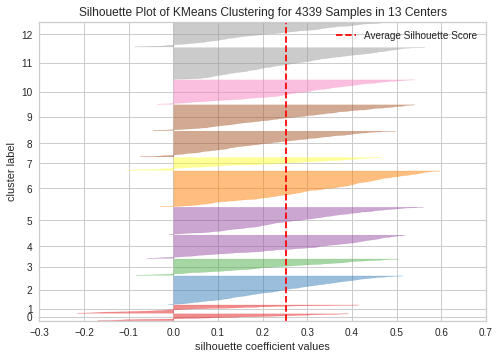

For n_clusters = 14, silhouette score is 0.24010044183710044


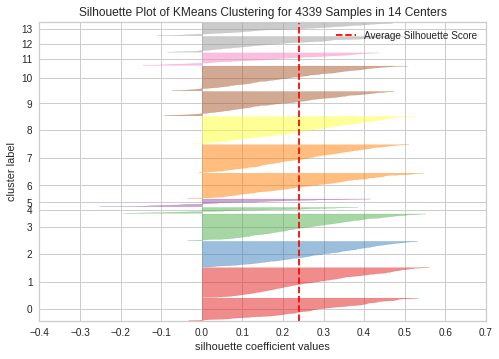

For n_clusters = 15, silhouette score is 0.251203565496199


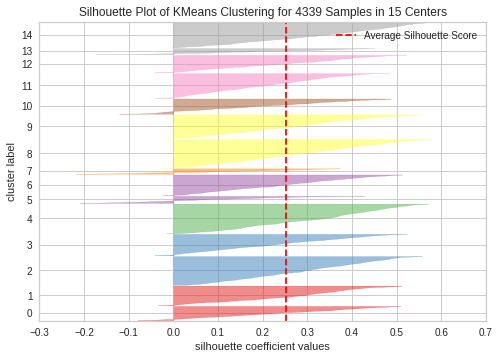

In [ ]:
# create empty list for ssd (sum of square distances),and Silhouette score
ssd_dict= dict()
sil_scores_dict = dict()

# for 2 to 15 clusters
for k in range(1,16):
    
  if k == 1:
    modelk1 = KMeans(n_clusters=k, random_state= 101, max_iter= 1000)
    
    # fitted on the data
    modelk1.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd_dict[k] = modelk1.inertia_ 
  
  # silhouette_score except minmaum k = 2
  if k != 1:

    # k-means model
    model = KMeans(n_clusters=k, random_state= 101, max_iter= 1000)
    
    # fitted on the data
    model.fit(scaled_X)
    # silhouette score
    sil_score = silhouette_score(scaled_X, model.labels_, metric="euclidean",random_state= 101)

    #Sum of squared distances of samples to their closest cluster center.
    ssd_dict[k] = model.inertia_
    
    # append th silhouette score
    sil_scores_dict[k] = sil_score

    print(f"For n_clusters = {k}, silhouette score is {sil_score}")

    visualizer = SilhouetteVisualizer(model)

    visualizer.fit(scaled_X) # Fit the scaled data to the visualizer
    visualizer.poof() # Draw/show/poof the data

**Let's Visulize the Silhouette plot with scatter plot.**

For n_clusters = 2 The average silhouette_score is : 0.39511734759235667
For n_clusters = 3 The average silhouette_score is : 0.3158248815627124
For n_clusters = 4 The average silhouette_score is : 0.30221603997536
For n_clusters = 5 The average silhouette_score is : 0.2921397454273569
For n_clusters = 6 The average silhouette_score is : 0.2825912546231868
For n_clusters = 7 The average silhouette_score is : 0.26541354226721453
For n_clusters = 8 The average silhouette_score is : 0.25638782334156807
For n_clusters = 9 The average silhouette_score is : 0.25188769039406156
For n_clusters = 10 The average silhouette_score is : 0.2511849070407324


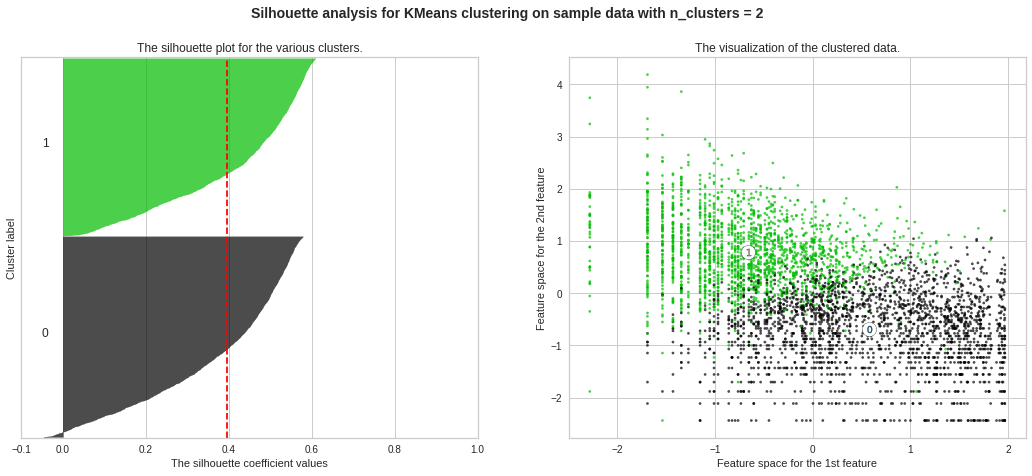

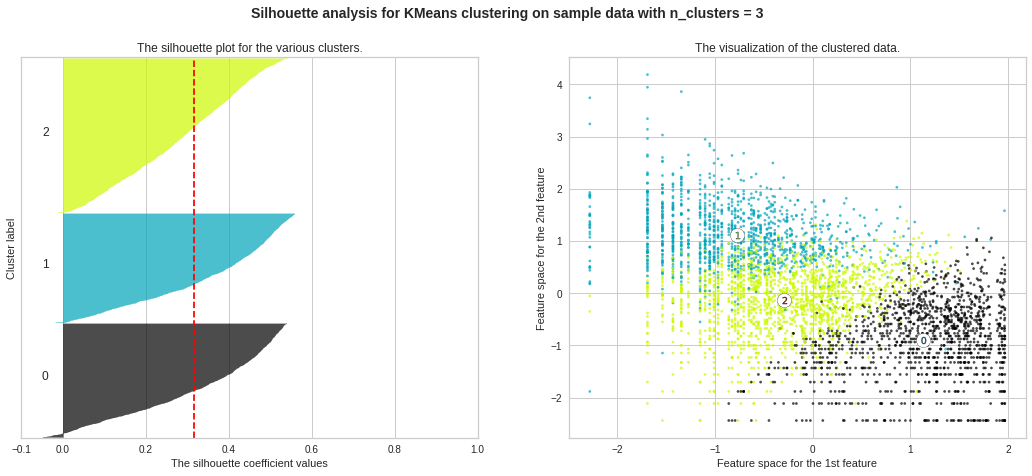

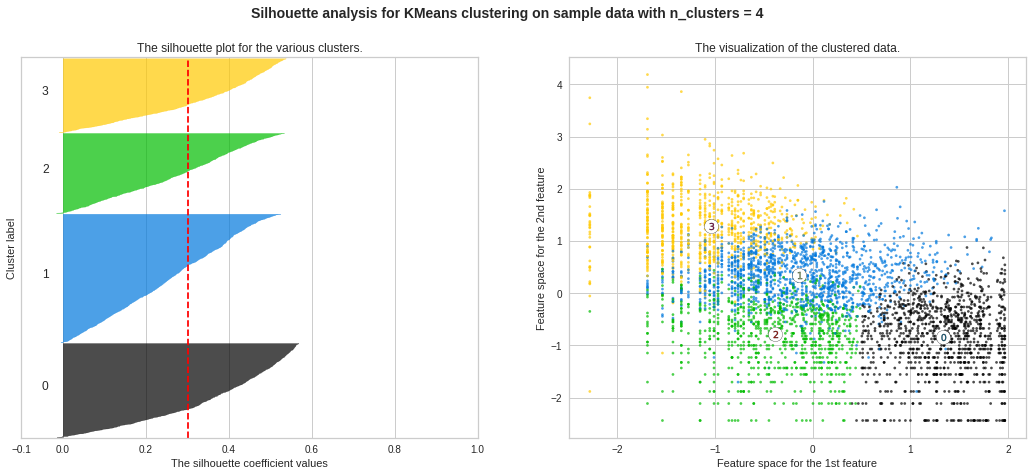

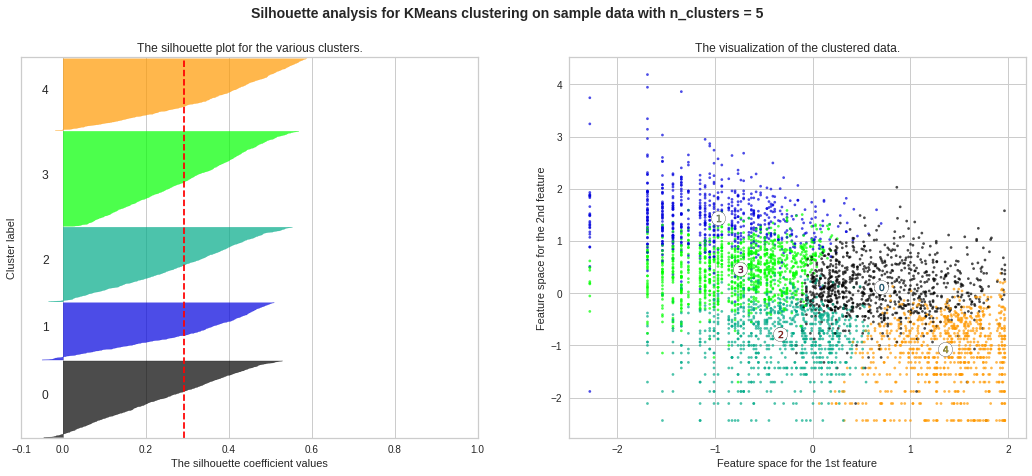

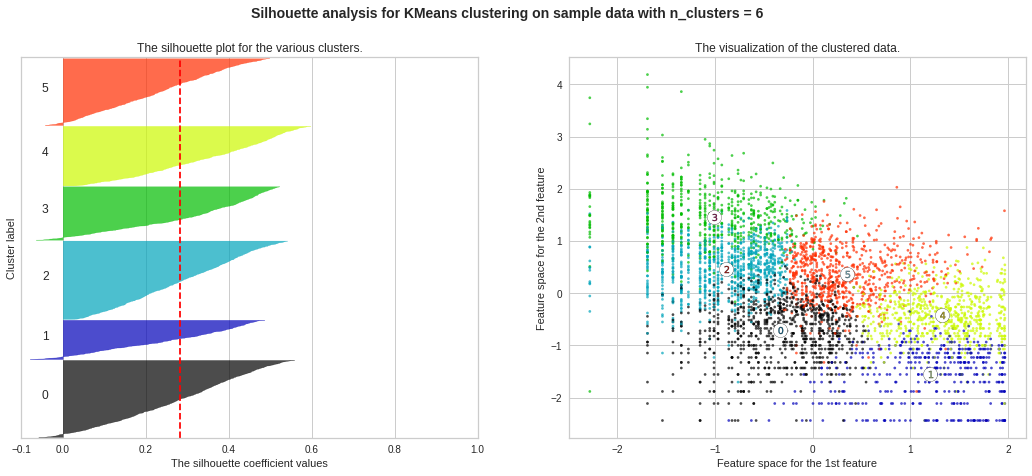

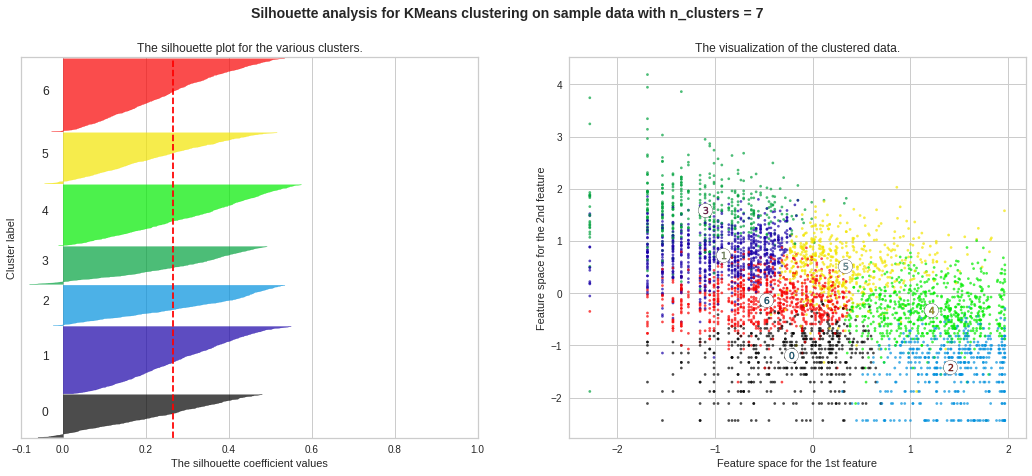

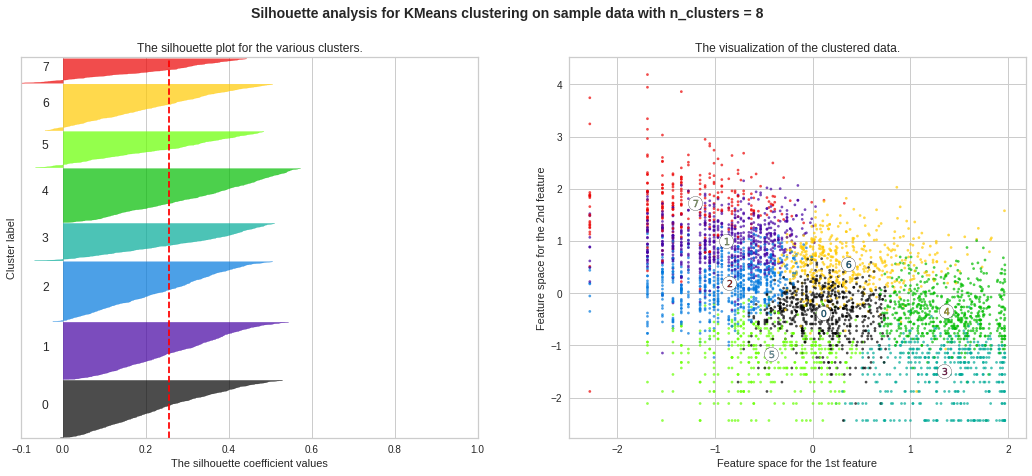

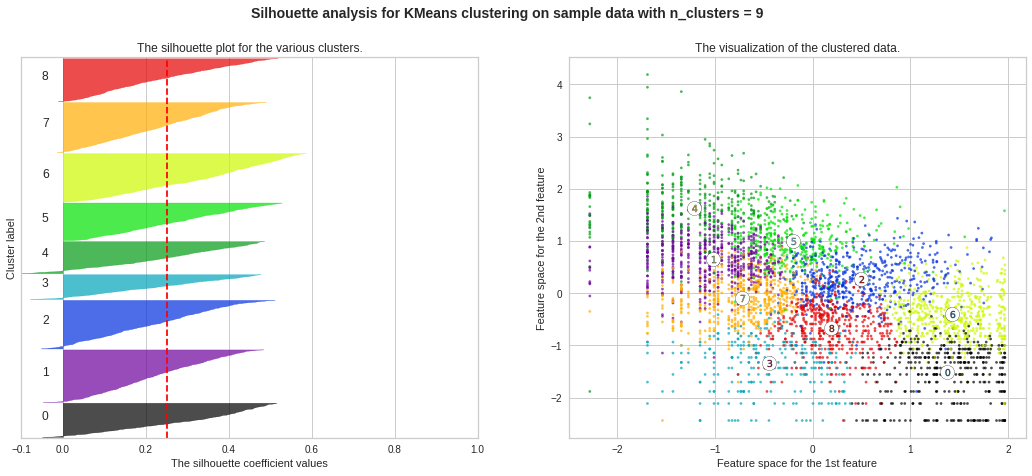

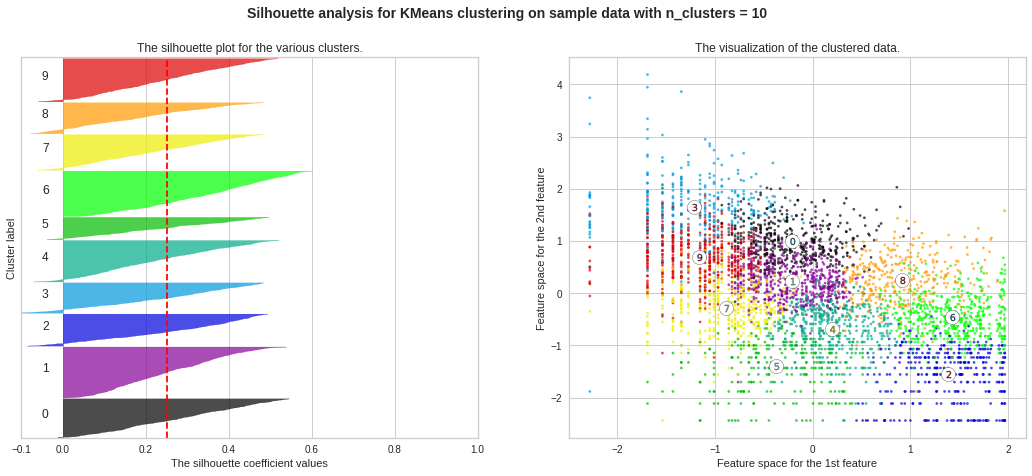

In [ ]:
#applying silhouette method on RFM

# 2 to 10
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(scaled_X[:, 0], scaled_X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

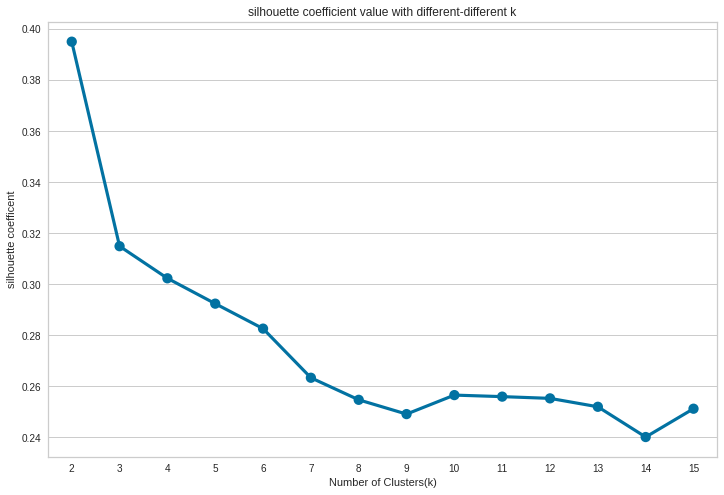

In [ ]:
# lets plot ssd with different- different value of k
line_plot(x=  list(sil_scores_dict.keys()), y= list(sil_scores_dict.values()), title= "silhouette coefficient value with different-different k",
          xlabel= "Number of Clusters(k)", ylabel= "silhouette coefficent")

* for K = 2 the value of silhouette coefficient is maximum which is 0.3951 (printed above).

### Applying Elbow Method on Recency, Frequency and Monetary

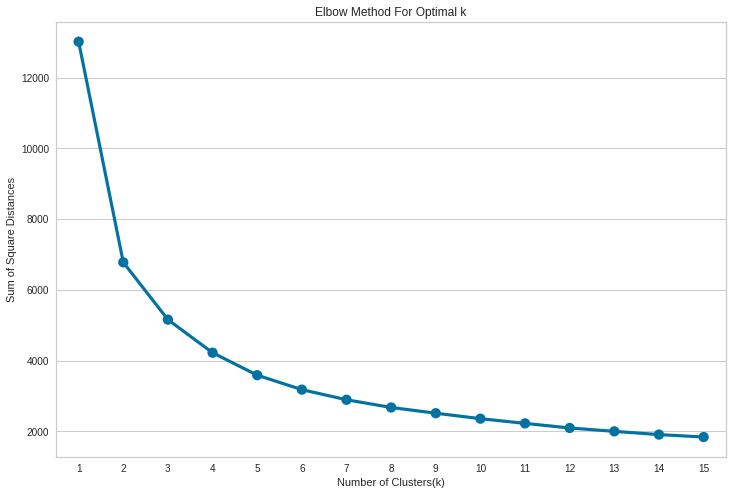

In [ ]:
# elbo plot
list_of_ssd = list(ssd_dict.values())
k_values = list(ssd_dict.keys())
line_plot(x= k_values, y= list_of_ssd, title= "Elbow Method For Optimal k", 
          xlabel= 'Number of Clusters(k)', ylabel= 'Sum of Square Distances')

In [ ]:
# series of  ssd
ssd_series = pd.Series(ssd_dict)
ssd_series

1     13017.000000
2      6780.685249
3      5160.395646
4      4226.609234
5      3591.292864
6      3182.751980
7      2896.779809
8      2678.990452
9      2516.556348
10     2362.080534
11     2228.941525
12     2099.436201
13     2003.759175
14     1912.394431
15     1843.172927
dtype: float64

In [ ]:
# take the the drop in value of ssd with k
ssd_series.diff()

1             NaN
2    -6236.314751
3    -1620.289603
4     -933.786412
5     -635.316370
6     -408.540884
7     -285.972171
8     -217.789357
9     -162.434104
10    -154.475814
11    -133.139009
12    -129.505324
13     -95.677025
14     -91.364744
15     -69.221504
dtype: float64


- from k = 1 to k = 2 value drop vaue in ssd is 6236.31.
- from k = 2 to k = 3 value drop in ssd is 1620.28. 
- from k= 3 to k= 4 value drop in ssd is 933 and so on
- There is no value to be subtracted behind it, so there is a NaN value at the index 1 position.



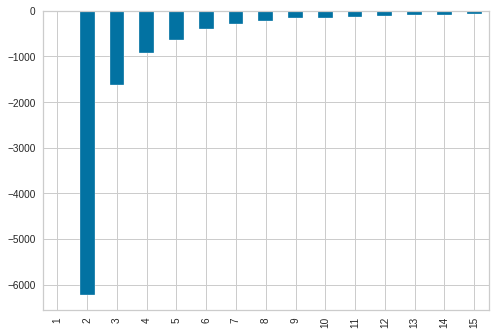

In [ ]:
# plot the ssd diffrence
ssd_series.diff().plot(kind='bar');

* *From the elbow method, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.*



In [ ]:
# fit for optimum  k 
kmeans = KMeans(n_clusters=2, random_state= 101)
kmeans.fit(scaled_X)

# evaluate the center of the clusters
centers = kmeans.cluster_centers_

# create a data frame for k-means
cluster_df = pd.DataFrame(
    {
        "Scaled Recency"   : scaled_X[:,0],
        "Scaled Frequency" : scaled_X[:,1],
        "Scaled Monetary"  : scaled_X[:,2],
        "Kmeans label"     : kmeans.labels_           # k- means cluster label   
    },
    index = rfm_df.index
)

scaled_features = ['Scaled Recency', "Scaled Frequency", "Scaled Monetary"]

cluster_df.head()

Scaled Recency  Scaled Frequency  Scaled Monetary  Kmeans label
CustomerID                                                                 
12346.0           1.777736         -2.436635         3.697687             0
12347.0          -1.539227          1.188865         1.411820             1
12348.0           0.207580         -0.210934         0.719046             1
12349.0          -0.735407          0.462036         0.701362             1
12350.0           1.714269         -0.672809        -0.611449             0

In [ ]:
def scatter_2d_plot(data, col1, col2, col3, hue, title, k_means = False, 
                    palette= 'tab10', centers= centers):
  """
  scatter plot b/w col1 and col2 , col2 and clo3 and col1 and col3
  """


  # creating blank- canvas
  fig, axes = plt.subplots(nrows= 1,ncols= 3, figsize=(24,8))

  
  # sactter plot for all columns passed in functios
  sns.scatterplot(data= data, x= col1, y= col2, hue = hue, ax= axes[0],linewidth=0,
                  alpha = 0.6,  palette=  palette, s= 50)
  
  sns.scatterplot(data= data, x= col1, y= col3, hue = hue, ax= axes[1], linewidth=0,
                  alpha = 0.6,  palette=  palette, s= 50)
  
  sns.scatterplot(data= data, x= col2, y= col3, hue = hue, ax= axes[2], linewidth=0,
                  alpha = 0.6,  palette=  palette, s= 50)
  
  # for k-means plot the centre of each clusters
  # col1 > centers[:, 0], col2 > centers[:, 1] , col3 > centers[:, 2]
  if k_means:
    axes[0].scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker = 'x', alpha= 0.8);
    axes[1].scatter(centers[:, 0], centers[:, 2], c='black', s=200, marker = 'x', alpha= 0.8);
    axes[2].scatter(centers[:, 1], centers[:, 2], c='black', s=200, marker = 'x', alpha= 0.8);

  plt.suptitle(title, size=16)

In [ ]:
# how centres look like
centers

array([[ 0.58065698, -0.69097767, -0.67529614],
       [-0.65680404,  0.78159213,  0.76385413]])

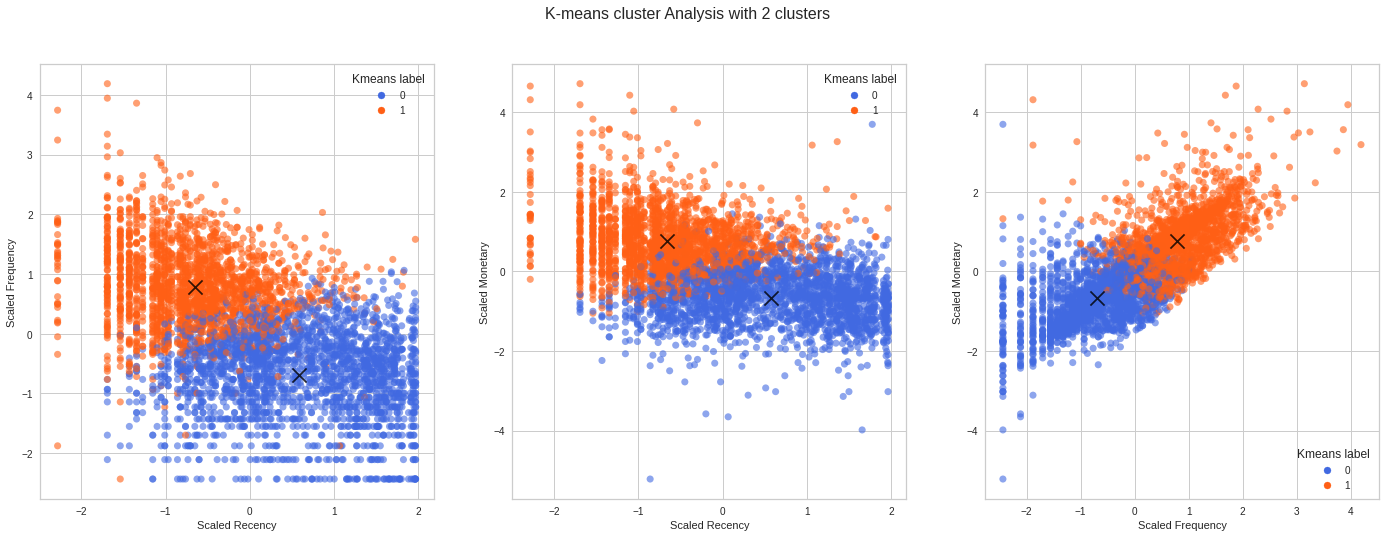

In [ ]:
# K-means cluster Analysis with 2 clusters
scatter_2d_plot(data= cluster_df, col1=  'Scaled Recency',col2= 'Scaled Frequency',col3= 'Scaled Monetary',
                hue= 'Kmeans label',title= 'K-means cluster Analysis with 2 clusters', k_means= True, 
                palette= ['#4169E1', '#FF5F15'], centers = centers)

In [ ]:
# lets see corretation of Kmeans label to Scaled Recency , Scaled Frequency , Scaled Monetary
cluster_df.corr()['Kmeans label']

Scaled Recency     -0.617867
Scaled Frequency    0.734914
Scaled Monetary     0.717922
Kmeans label        1.000000
Name: Kmeans label, dtype: float64

In [ ]:
# 3d scatter plot for k-means clustering with 2 clusters

# change data type to str for plot
cluster_df['Kmeans label'] = cluster_df['Kmeans label'].astype(str)

scatter3d_plot(data= cluster_df, col1='Scaled Recency', col2='Scaled Frequency', col3='Scaled Monetary',
                color= "Kmeans label", title= 'K-means clusters')


 Analyzing the clustered data


In [ ]:
# assign the cluster lable of k-means in rfm_df 
rfm_df['cluster'] = cluster_df['Kmeans label'].values

In [ ]:
#  select few features to do groupby aggregations
rfm_df.groupby('cluster').mean()

Recency   Frequency     Monetary  Recency_cbrt  Frequency_log  \
cluster                                                                     
0        144.750652   23.172024   448.541995      4.849707       2.867312   
1         32.475209  166.612666  3855.996673      2.753769       4.701723   

         Monetary_log   RFMScore  
cluster                           
0            5.734690   6.105126  
1            7.550283  12.235150

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<br/>


**Insights:**



We can see from above that the customer belongs to cluster 1 are premium customers and we can keep them in comapny's loyalty program and for the customer belongs to cluster 0 we can provide them offer or create some strategies for them so that they will do more transaction with us.



-----

### Hierarchical clustering
Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.

**Dendogram**

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

<br/>

<img src= https://miro.medium.com/max/640/1*VvOVxdBb74IOxxF2RmthCQ.png >

<br/>
<br/>




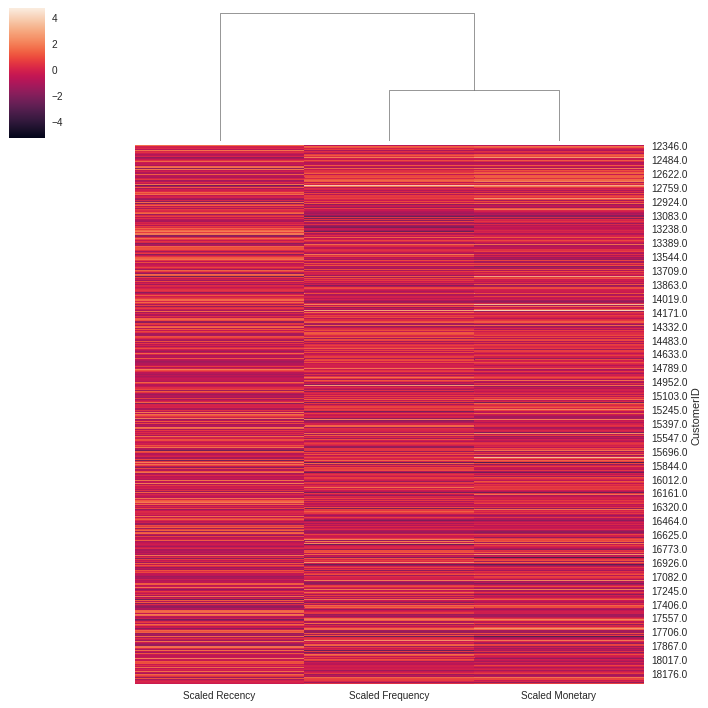

In [ ]:
# seaborn clustermap by columns
sns.clustermap(cluster_df[scaled_features],row_cluster=False);

* Feature clusters make sense because for frequency and monetary, a higher value is considered a good score.But the rules of recency are opposite so we can see that recency is different from other features.

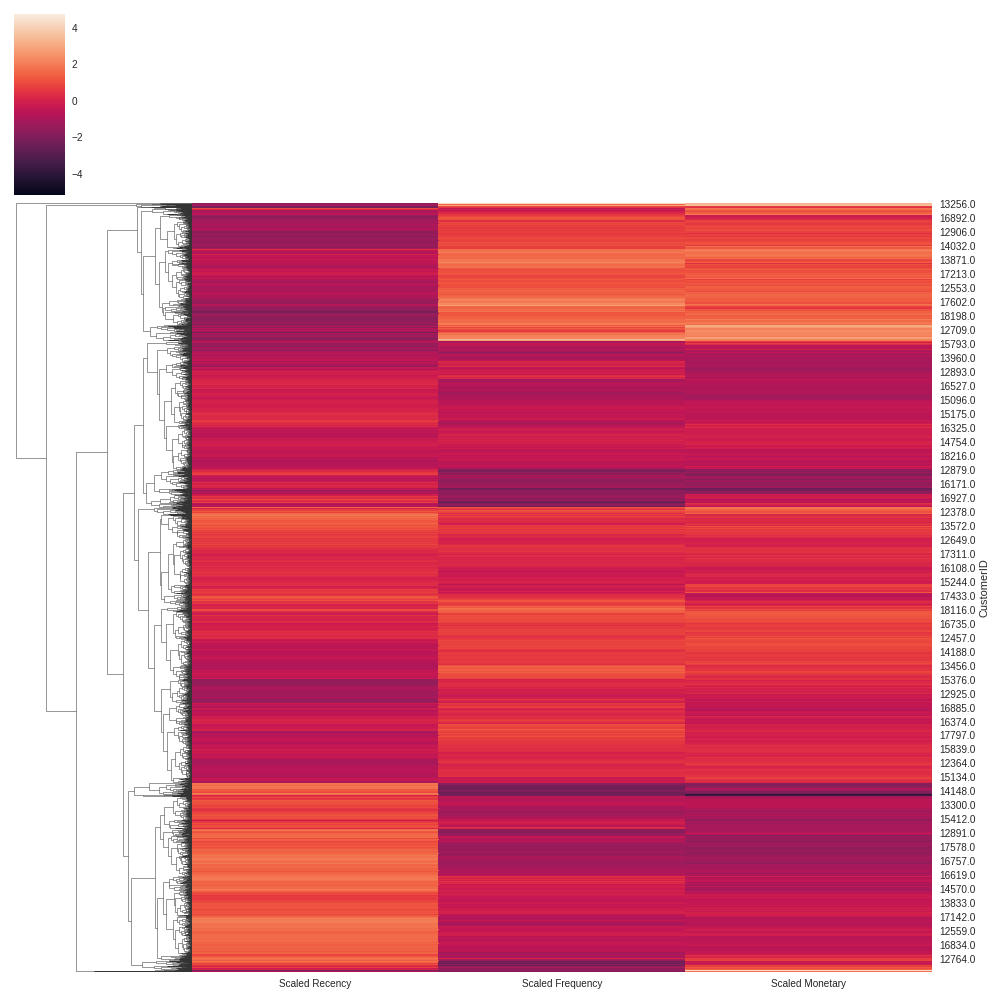

In [ ]:
# seaborn clustermap by rows
sns.clustermap(cluster_df[scaled_features],col_cluster=False, figsize=(14,14));

**This clusterplot is hard to interpret, let's visualize it using scipy**

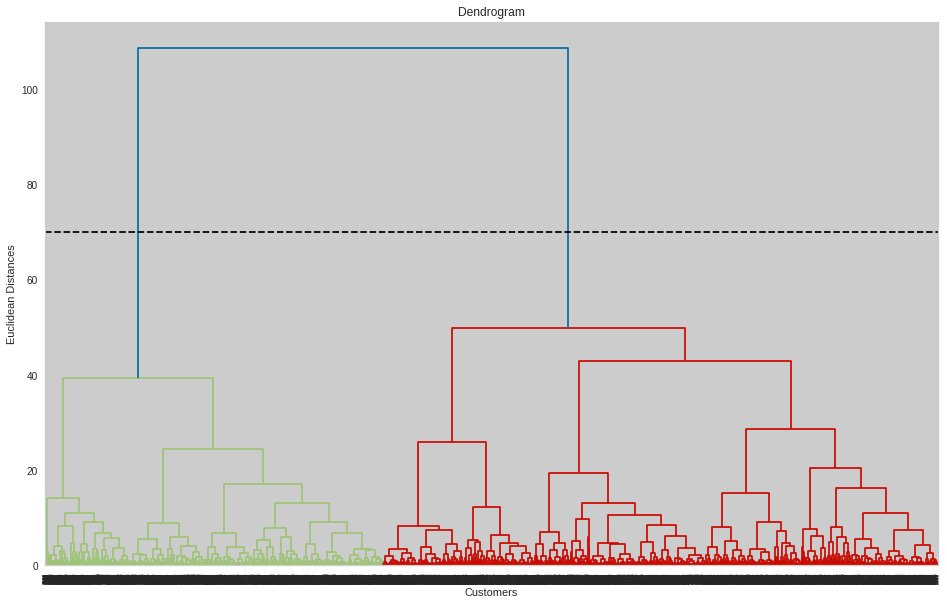

In [ ]:
# Using the dendogram to find the optimal number of clusters
#importing necessary library
import scipy.cluster.hierarchy as sch
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(16,10))

# plot the dendogram for scaled features 
dendrogram = sch.dendrogram(sch.linkage(cluster_df[scaled_features], method = 'ward'))

# horizontal line at y = 70 
plt.axhline(y = 70, color = 'black', linestyle = '--')

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() 

- Here, we can see No. of Clusters = 2 could be a good choice, 
- 5 cluster would be my 2nd choice. 2 from green three from red.

In [ ]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

# choose n = 2 clusters and 5 

for n_clusters in [2,5]: 
  hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')

  # predict the cluster label
  y_hc = hc.fit_predict(scaled_X)

  # assign the label 
  cluster_df[f'HC label {n_clusters}'] = y_hc   # HC label 2 means HC labels for 2 clusters , HC label 5 is for 5 clusters 


cluster_df.head(10)

Scaled Recency  Scaled Frequency  Scaled Monetary Kmeans label  \
CustomerID                                                                   
12346.0           1.777736         -2.436635         3.697687            0   
12347.0          -1.539227          1.188865         1.411820            1   
12348.0           0.207580         -0.210934         0.719046            1   
12349.0          -0.735407          0.462036         0.701362            1   
12350.0           1.714269         -0.672809        -0.611449            0   
12352.0          -0.333039          0.582675         0.982329            1   
12353.0           1.193794         -1.701081        -1.653757            0   
12354.0           1.346114          0.280191         0.315377            0   
12355.0           1.249708         -0.874552        -0.360464            0   
12356.0          -0.628316          0.293683         1.073404            1   

            HC label 2  HC label 5  
CustomerID                          
12346.0              0           3  
12347.0              1           4  
12348.0              0           3  
12349.0              1           1  
12350.0              0           2  
12352.0              1           1  
12353.0              0           2  
12354.0              0           3  
12355.0              0           2  
12356.0              1           1

In [ ]:
# ltrs check the correlation of HC label 2
cluster_df.corr()['HC label 2']

Scaled Recency     -0.648808
Scaled Frequency    0.689274
Scaled Monetary     0.684697
HC label 2          1.000000
HC label 5          0.104178
Name: HC label 2, dtype: float64

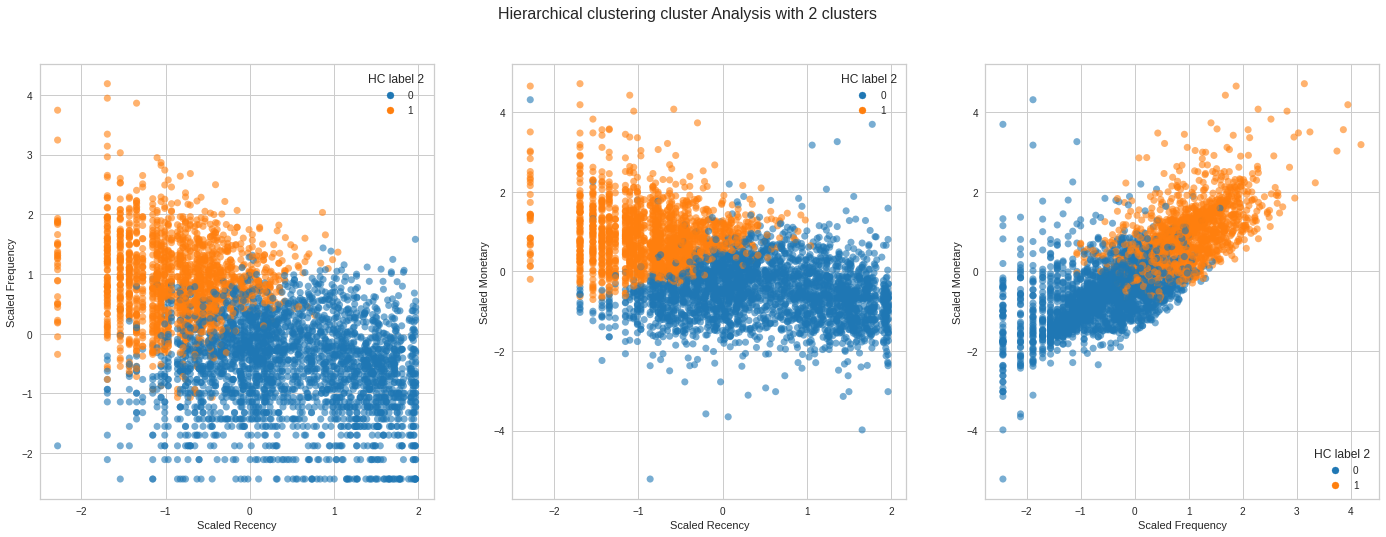

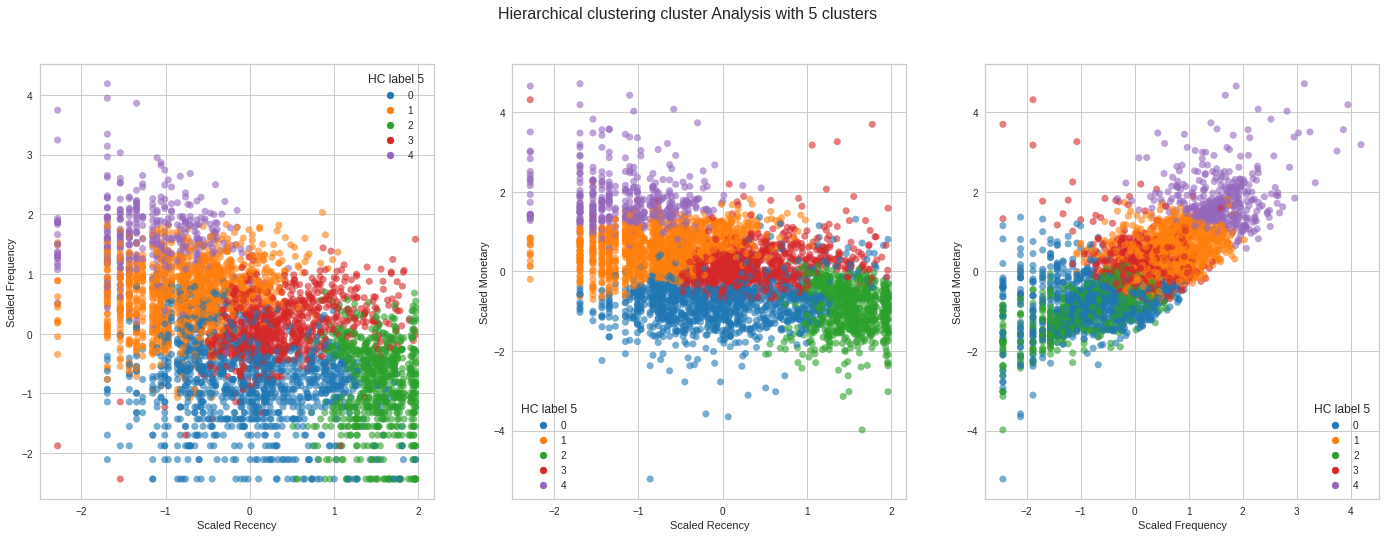

In [ ]:
# lets visulize the clusters in 2d plot 
for i in [2,5]:
  scatter_2d_plot(data= cluster_df, col1=  'Scaled Recency',col2= 'Scaled Frequency',col3= 'Scaled Monetary',
                hue= f'HC label {i}',title= f'Hierarchical clustering cluster Analysis with {i} clusters', palette= 'tab10')

In [ ]:
# In 3-D
# 3d scatter plot for Hierarchial Clustering

cluster_df[['HC label 2', 'HC label 5']] = cluster_df[['HC label 2', 'HC label 5']].astype(str)

scatter3d_plot(data= cluster_df, col1='Scaled Recency', col2='Scaled Frequency', col3='Scaled Monetary',
                color= "HC label 2", title = 'Hierarchical clustering cluster Analysis with 2 clusters')

In [ ]:
# for 5 clusters
scatter3d_plot(data= cluster_df, col1='Scaled Recency', col2='Scaled Frequency', col3='Scaled Monetary',
                color= "HC label 5", title = 'Hierarchical clustering cluster Analysis with 5 clusters')

HC and k-means for two groups represent approximately the same group of customers, let's examine 5 clusters.

In [ ]:
# assign the cluster lable of Hierarchical clustering in rfm_df 
rfm_df['5 clusters'] = cluster_df['HC label 5'].values

#  select few features to do groupby aggregations and sort the clusters by RFMScore
rfm_df.groupby('5 clusters').mean().sort_values(by= 'RFMScore')

Recency   Frequency      Monetary  Recency_cbrt  Frequency_log  \
5 clusters                                                                      
2           265.793243   19.041892    280.588838      6.387447       2.669582   
0            72.107460   20.183837    344.038553      3.801037       2.724854   
3           103.231047   54.672684   1472.102144      4.489389       3.857007   
1            25.000000  112.841334   1737.637112      2.621156       4.538137   
4            12.053269  415.978208  11945.067433      1.972623       5.694287   

            Monetary_log   RFMScore  
5 clusters                           
2               5.420491   4.454054  
0               5.581396   6.498224  
3               6.800111   8.868833  
1               7.305291  12.222945  
4               8.852960  14.460048

###**Applying DBSCAN to Recency, Frequency and Monetary**

The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

<br/>

<img src="https://miro.medium.com/max/1087/0*bUyZlx3rbNneiUA_" width="640">

<br/>
<br/>

DBSCAN algorithm requires two parameters:

------
### Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.


### Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.


------

Hyperparameter tuning of DBSCAN:

*  Epsilon

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# empty list for the outliers
outlier_percent_ep = dict()
number_of_outliers_ep = dict()

# 100 linearly spaced epsilon values from 0.001 to 3
for eps in np.linspace(0.001,3,100):
    
    # Create Model
    dbscan_ep = DBSCAN(eps=eps)
    dbscan_ep.fit(scaled_X)
    
    #  Number of Outliers,  In DBSCAN outliers is labled as -1
    number_of_outliers_ep[eps] = np.sum(dbscan_ep.labels_ == -1)
    
    #  percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan_ep.labels_ == -1) / len(dbscan_ep.labels_)
    
    outlier_percent_ep[eps] = perc_outliers

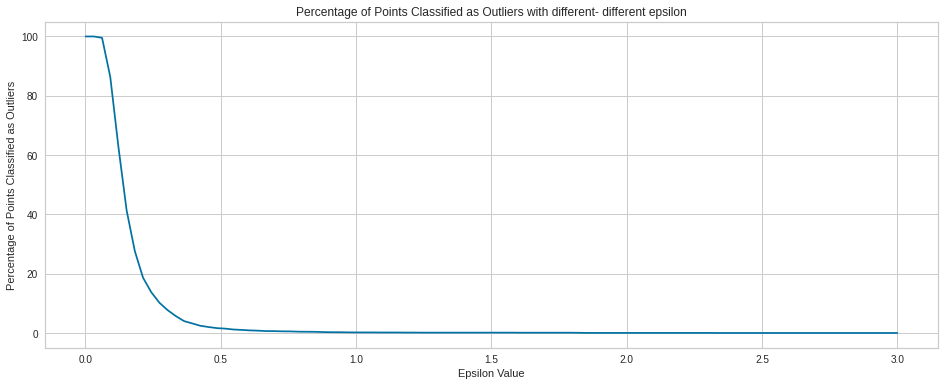

In [ ]:
# lest plot the outliers
line_plot(x= outlier_percent_ep.keys(), title= "Percentage of Points Classified as Outliers with different- different epsilon", 
          y = outlier_percent_ep.values(),  xlabel= 'Epsilon Value' ,
          ylabel= 'Percentage of Points Classified as Outliers',
          points = False, figsize= (16, 6))

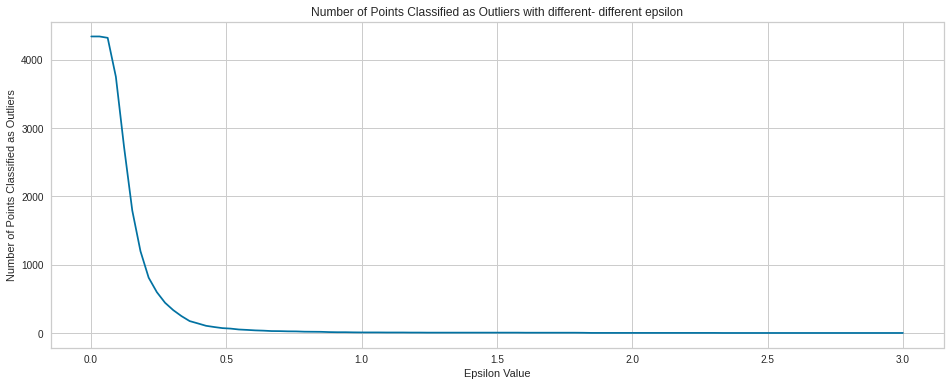

In [ ]:
# Number of Points Classified as Outliers with different- different epsilon
line_plot(x= number_of_outliers_ep.keys(), title= "Number of Points Classified as Outliers with different- different epsilon", 
          y = number_of_outliers_ep.values(),  xlabel= 'Epsilon Value' ,
          ylabel= 'Number of Points Classified as Outliers',
          points = False, figsize= (16, 6))

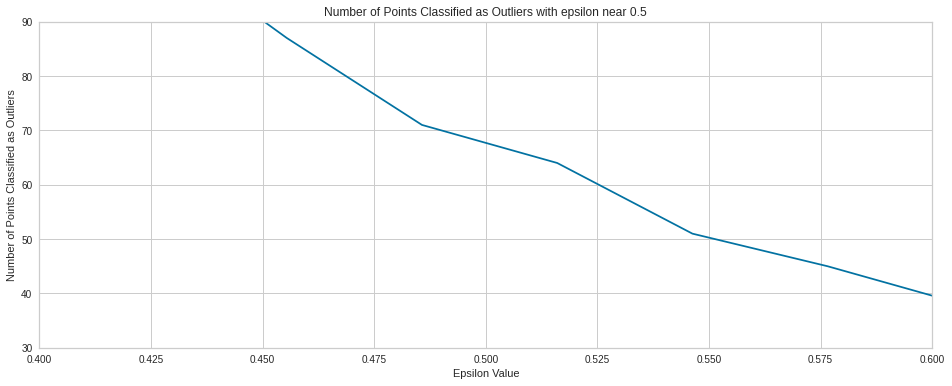

In [ ]:
# lets zoom near epsilon = 0.5 
line_plot(x= number_of_outliers_ep.keys(), title= "Number of Points Classified as Outliers with epsilon near 0.5", 
          y = number_of_outliers_ep.values(),  xlabel= 'Epsilon Value' ,
          ylabel= 'Number of Points Classified as Outliers',
          points = False, figsize= (16, 6))

# set x and y lim for zooming
plt.ylim(30,90)
plt.xlim(0.4,0.6);

*  At epsilon = 0.5 , there are 69 points that would labled as outliers. 

In [ ]:
# function for plotting the plotly
def line_plot_plotly(x_values,y_values, title, xlabel, ylabel):

  fig = go.Figure()
  
  # add trace
  fig.add_trace(
      go.Scatter(x= x_values, y= y_values, mode= 'lines')
  )

  # update the layout
  fig.update_layout(
      go.Layout(title= title, xaxis_title= xlabel, yaxis_title= ylabel )
  )


  fig.show()

In [ ]:
# let's visulize Outliers with different- different epsilon values in plotly
line_plot_plotly(x_values=  list(number_of_outliers_ep.keys()), title= "Number of Points Classified as Outliers with different- different epsilon", 
          y_values = list(number_of_outliers_ep.values()), xlabel= 'Epsilon Value' ,
          ylabel= 'Number of Points Classified as Outliers')

**Hyperparameter tuning of DBSCAN:**

* Minimum Samples

In [ ]:
# empty dict for the outliers
outlier_percent_n = dict()
number_of_outliers_n = dict()

# for n = 1 every outliers will consider itsel as a cluster
for n in np.arange(1,50):
    
    # Create Model
    dbscan_n = DBSCAN(min_samples=n)
    dbscan_n.fit(scaled_X)

    #  Number of Outliers,  In DBSCAN outliers is labled as -1
    number_of_outliers_n[n] = np.sum(dbscan_n.labels_ == -1)
    

    # percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan_n.labels_ == -1) / len(dbscan_n.labels_)
    
    outlier_percent_n[n] = perc_outliers

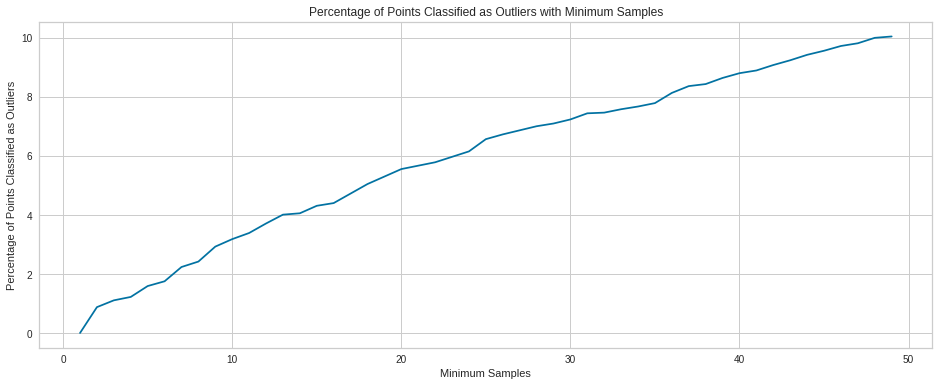

In [ ]:
# lest plot the outliers 
line_plot(x= outlier_percent_n.keys(), title= "Percentage of Points Classified as Outliers with Minimum Samples", 
          y = outlier_percent_n.values(),  xlabel= 'Minimum Samples' ,
          ylabel= 'Percentage of Points Classified as Outliers',
          points = False, figsize= (16, 6))

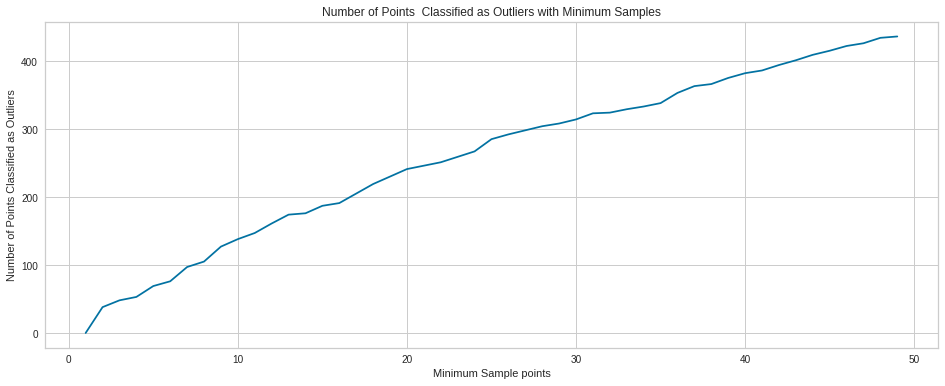

In [ ]:
# lest plot the outliers
line_plot(x= number_of_outliers_n.keys(), title= "Number of Points  Classified as Outliers with Minimum Samples", 
          y = number_of_outliers_n.values(),  xlabel= 'Minimum Sample points' ,
          ylabel= 'Number of Points Classified as Outliers',
          points = False, figsize= (16, 6))

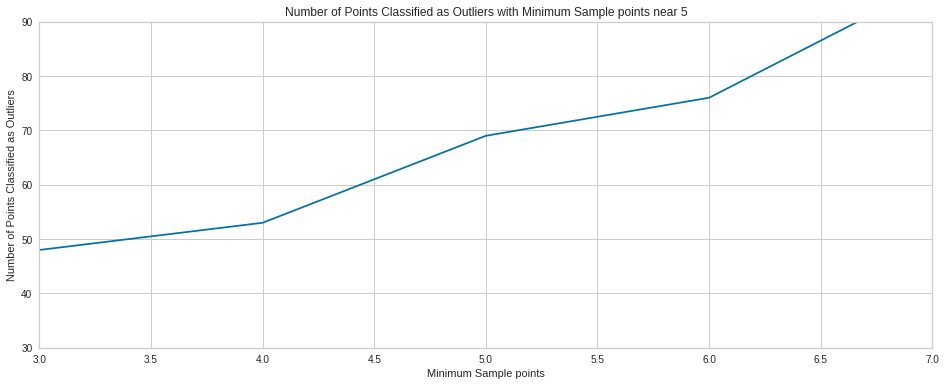

In [ ]:
# lets zoom near min_sample = 5
line_plot(x= number_of_outliers_n.keys(), title= "Number of Points Classified as Outliers with Minimum Sample points near 5", 
          y = number_of_outliers_n.values(),  xlabel= 'Minimum Sample points' ,
          ylabel= 'Number of Points Classified as Outliers',
          points = False, figsize= (16, 6))


# set x and y lim for zooming
plt.ylim(30,90)
plt.xlim(3,7);

In [ ]:
# lets visulize Outliers with different- different Minimum Sample points in plotly
line_plot_plotly(x_values=  list(number_of_outliers_n.keys()), y_values = list(number_of_outliers_n.values()),
                 title= "Number of Points Classified as Outliers with different- different Minimum Sample points", 
                 xlabel= 'Minimum Sample points' , ylabel= 'Number of Points Classified as Outliers')

* At default values of epsilon = 0.5  and min_samples = 5, there are 69 points that are consider as outliers, You can adjust the parameters according to how many outliers you want. I am going with default one.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# choosing
dbscan = DBSCAN(eps=0.5, min_samples= 5)

# predict the cluster label
y_db = dbscan.fit_predict(scaled_X)

# assign the label 
cluster_df['DBSCAN label'] = y_db

cluster_df.head()

Scaled Recency  Scaled Frequency  Scaled Monetary Kmeans label  \
CustomerID                                                                   
12346.0           1.777736         -2.436635         3.697687            0   
12347.0          -1.539227          1.188865         1.411820            1   
12348.0           0.207580         -0.210934         0.719046            1   
12349.0          -0.735407          0.462036         0.701362            1   
12350.0           1.714269         -0.672809        -0.611449            0   

           HC label 2 HC label 5  DBSCAN label  
CustomerID                                      
12346.0             0          3            -1  
12347.0             1          4             0  
12348.0             0          3             0  
12349.0             1          1             0  
12350.0             0          2             0

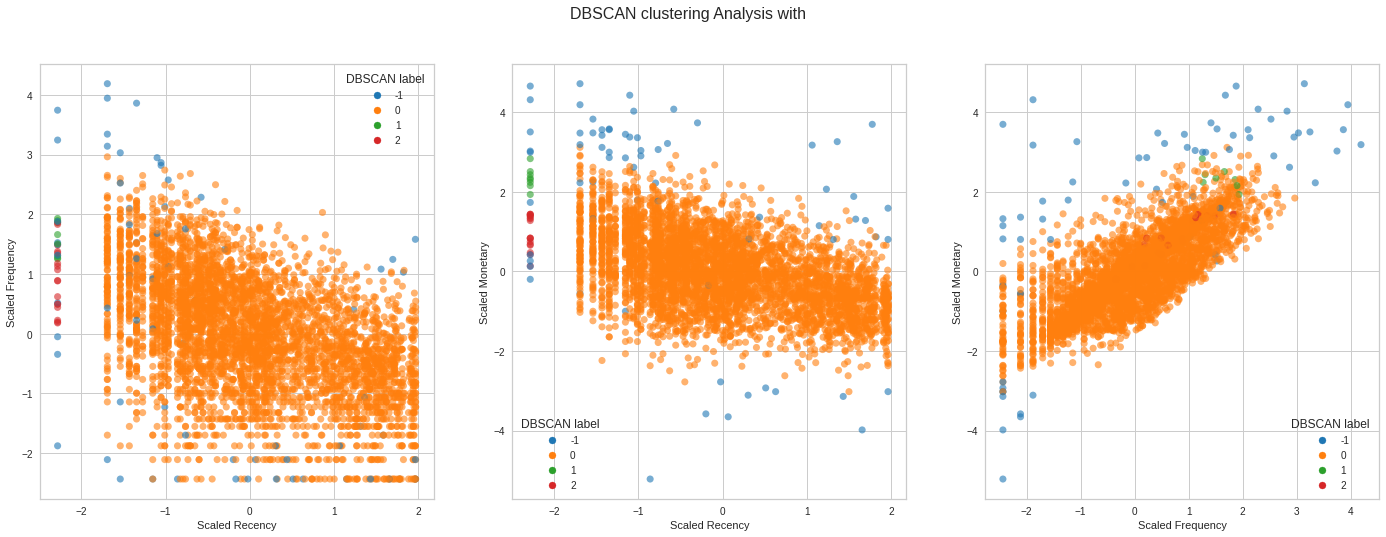

In [ ]:
# lets visulize the clusters in 2d plot 
scatter_2d_plot(data= cluster_df, col1=  'Scaled Recency',col2= 'Scaled Frequency',col3= 'Scaled Monetary',
                hue= 'DBSCAN label',title= 'DBSCAN clustering Analysis with')

* There are 3 clusters, cluster 0 is the largest
cluster other clusters are 1 and 2, while -1 is outliers

In [ ]:
# 3d scatter plot for DBSCAN
cluster_df['DBSCAN label'] = cluster_df['DBSCAN label'].astype(str)

scatter3d_plot(data= cluster_df, col1='Scaled Recency', col2='Scaled Frequency', col3='Scaled Monetary',
                color= 'DBSCAN label', title = 'DBSCAN clustering Analysis')

* It seems DBSCAN clustering is not good approach to cluster this data-set.
* Just rotate the plot a bit to see other cluster groups







# Conclusion

* This project mainly focused on developing customer segments for a UK based online store, selling unique all occasion gifts.

* Retention rate for all users is monotonically decreasing over time, while the retention rate for cohort dates from December 2010 to September 2011 is not monotonic in nature.

* Using a recency, frequency and monetary(RFM) analysis, the customers have been segmented into various clusters and got a silhouette score of 0.39 for two clusters 

* By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.

* Since this is an unsupervised learning approach, there is no 100% correct answer, number of clusters will vary depending on the company's requirement.

* The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large. 